<h1><font color='green'><center>Space Mission Analysis</center></font></h1>


### About the dataset
* This is an analysis of all space mission from 1957 to August 2022. Data is provided by [Maven Analytics](https://www.mavenanalytics.io).
* This dataset contains a csv table with 4,631 records, one for each space mission
* Each record contains details on each mission's name, location, date, and status of the launch, the company responsible, and the price, status, and name of the rocket

In [1]:
# Import the packages that will be needed in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define some setting across all plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.titlesize'] = 16

In [2]:
# Import the csv file
space_missions_raw = pd.read_csv('https://raw.githubusercontent.com/Fawzy-Almatary/Portfolio-Projects/main/Space-Missions/space_missions.csv', encoding='ISO-8859-1')

# Make a copy of the data so the original is not affected, just in case it is needed
space_missions = space_missions_raw.copy()

# Have a look at the data
print(f"Shape of data: {space_missions.shape}") 
print("\n")
space_missions.info()
print("\n")
space_missions.sample(10, random_state=5)

Shape of data: (4630, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB




,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
2314,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1987-03-03,15:02:00,Tsyklon-3,Cosmos 1825,Retired,NaN,Success
2233,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1985-11-28,13:12:00,Cosmos-3M (11K65M),Cosmos 1704,Retired,NaN,Success
2443,Arianespace,"ELA-1, Guiana Space Centre, French Guiana, France",1989-07-12,00:14:00,Ariane 3,Olympus-1,Retired,NaN,Success
757,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1969-04-11,02:30:00,Molniya-M /Block L,Molniya-1 nâ Â­16,Retired,NaN,Success
3291,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003-08-25,NaN,VLS-1,"SATEC, UNOSAT",Retired,NaN,Prelaunch Failure
240,General Dynamics,"SLC-3E, Vandenberg AFB, California, USA",1963-06-12,NaN,Atlas-LV3 Agena-B,Midas 8,Retired,NaN,Failure
3517,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...",2008-08-17,NaN,Safir-1,Unknown Payload,Retired,NaN,Failure
2676,ISAS,"Mu Pad, Uchinoura Space Center, Japan",1993-02-20,02:20:00,Mu-III S2,Asuka,Retired,NaN,Success
2514,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1990-07-30,00:06:00,Tsyklon-3,Cosmos 2088,Retired,NaN,Success
1649,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1977-08-24,18:20:00,Cosmos-3M (11K65M),Cosmos 939 to 946,Retired,NaN,Success


## Notes:
* __Some columns types need to be changed like the Price and Date columns.__
* __For better analysis, I will extract the year, month, and day name from the date column.__
* __Also, I will create a 'Decade' column.__
* __Since day names and decades will be string, so they need to be arranged as categories.__

In [3]:
# Change the column type for 'Price' and 'Date' into 'float' and 'datetime' respectively
space_missions['Price'] = space_missions['Price'].str.replace(',', '').astype(float)
space_missions['Date'] = pd.to_datetime(space_missions['Date'], format= "%Y-%m-%d")

# Create new columns from the 'Date' column
space_missions['Year'] = space_missions['Date'].dt.year
space_missions['Month'] = space_missions['Date'].dt.month
space_missions['DayName'] = space_missions['Date'].dt.day_name()

# Arrange the Day Names from Monday to Sunday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
space_missions['DayName'] = pd.Categorical(space_missions['DayName'], weekday_order)

space_missions.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Year,Month,DayName
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957,10,Friday
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957,11,Sunday
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,1957,12,Friday
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,1958,2,Saturday
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958,2,Wednesday


In [4]:
space_missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   object        
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   float64       
 8   MissionStatus  4630 non-null   object        
 9   Year           4630 non-null   int64         
 10  Month          4630 non-null   int64         
 11  DayName        4630 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 402.9+ KB


In [5]:
# Also, create a column for the decade to make it easier to analyze later
decades = []
for x in space_missions['Year']:
    decade = int(np.floor(x / 10) * 10)
    decades.append(decade)

space_missions['Decade'] = decades

space_missions['Decade'] = space_missions['Decade'].apply(str)
space_missions['Decade'] += "'s"

decades_order = ["1950's", "1960's","1970's", "1980's", "1990's", "2000's" ,"2010's", "2020's"]
space_missions['Decade'] = pd.Categorical(space_missions['Decade'], decades_order)

space_missions['Decade'].value_counts()

1970's    1012
1960's     774
2010's     676
1990's     642
1980's     631
2000's     475
2020's     369
1950's      51
Name: Decade, dtype: int64

## Notes about the country:

* __I will create a column for the country name by extracting it from the Location column.__
* __As seen in list created in the next cell, some names are not of real countries, After doing some research, each location is replaced with the country it belongs to.__
* __The only exception that was not changed to a country name is 'Pacific Ocean'.__
 * The only location where Space Mission took place there is 'LP Odyssey, Kiritimati Launch Area'.
 * These launches were all done by the same company, Sea Launch, which was a multinational—Norway, Russia, Ukraine, United States—spacecraft launch company founded in 1995 that provided orbital launch services from 1999–2014.
 * Instead of changing the 'Pacific Ocean' to a country name, I thought it would be more appropriate to change it to the company name, Sea Launch.
* __For Russia, I renamed it 'Russia/USSR' to be more accurate.__
* __As for Kazakhstan, the name of Kazakhstan was changed to 'Russia/USSR' on all the missions that took place before December 16, 1991, since Kazakhstan officially seceded from USSR on December 16, 1991. Before that, Kazakhstan was part of the USSR.__


In [6]:
# Create a new column for 'Country' from the 'Location' column
space_missions['Country'] = space_missions['Location'].str.split(',').str[-1].str.strip()
space_missions['Country'].value_counts()

USA                               1467
Russia                            1416
Kazakhstan                         719
China                              365
France                             318
Japan                              130
India                               82
Pacific Ocean                       36
New Zealand                         28
Iran                                16
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
South Korea                          5
New Mexico                           4
Yellow Sea                           3
Brazil                               3
Barents Sea                          3
Gran Canaria                         2
Pacific Missile Range Facility       1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In [7]:
# As seen in the list above, some names are not of real countries
# After doing some research, each location is replaced with the country it belong to
space_missions['Country'].replace("Russia", "Russia/USSR", inplace=True)
space_missions['Country'].replace("Shahrud Missile Test Site", "Iran", inplace=True)
space_missions['Country'].replace("Yellow Sea", "China", inplace=True)
space_missions['Country'].replace("Barents Sea", "Russia/USSR", inplace=True)
space_missions['Country'].replace("Gran Canaria", "Spain", inplace=True)
space_missions['Country'].replace("Pacific Missile Range Facility", "USA", inplace=True)
space_missions['Country'].replace("New Mexico", "USA", inplace=True)

# Kazakhstan
space_missions.loc[(space_missions['Date'] < '1990-12-16') & (space_missions['Country'] == 'Kazakhstan'), 'Country'] = 'Russia/USSR'  

# Also, I added the country name to the location in the Location column
space_missions['Location'].replace("Launch Plateform, Shahrud Missile Test Site", "Launch Platform, Shahrud Missile Test Site, Iran", inplace=True)
space_missions['Location'].replace("LP-41, Kauai, Pacific Missile Range Facility", "LP-41, Kauai, Pacific Missile Range Facility, USA", inplace=True)
space_missions['Location'].replace("Vertical Launch Area, Spaceport America, New Mexico", "Vertical Launch Area, Spaceport America, New Mexico, USA", inplace=True)

# Pacific Ocean
space_missions['Country'].replace("Pacific Ocean", "Sea Launch", inplace=True)

space_missions['Country'].value_counts()

Russia/USSR    1997
USA            1472
China           368
France          318
Kazakhstan      141
Japan           130
India            82
Sea Launch       36
New Zealand      28
Iran             17
Israel           11
Kenya             9
Australia         6
North Korea       5
South Korea       5
Brazil            3
Spain             2
Name: Country, dtype: int64

## Plotting some graphs about the time of launches:
 

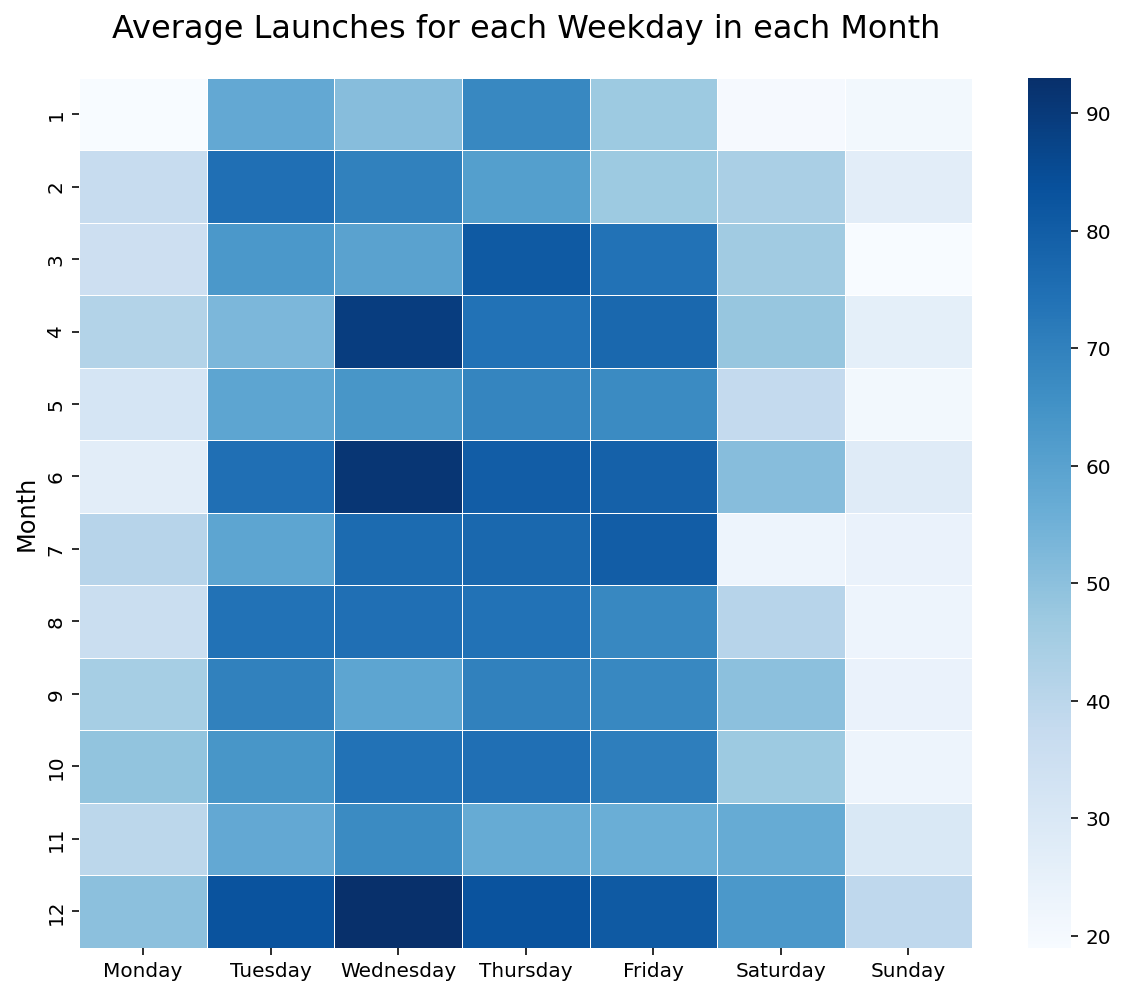

In [8]:
# Create a heat map to explore what are the most common days for launching
month_day = space_missions[['Month', 'DayName']].copy()
month_day['Count'] = 1
month_day_grpd = month_day.groupby(['Month', 'DayName'])['Count'].count().reset_index()
month_day_grpd_uniform = month_day_grpd.pivot("Month", "DayName", "Count")

sns.heatmap(month_day_grpd_uniform, linewidths=.5, cmap="Blues")
plt.title('Average Launches for each Weekday in each Month',  pad=20)
plt.xlabel(xlabel=None)
plt.ylabel('Month', fontsize = 12)
plt.show()

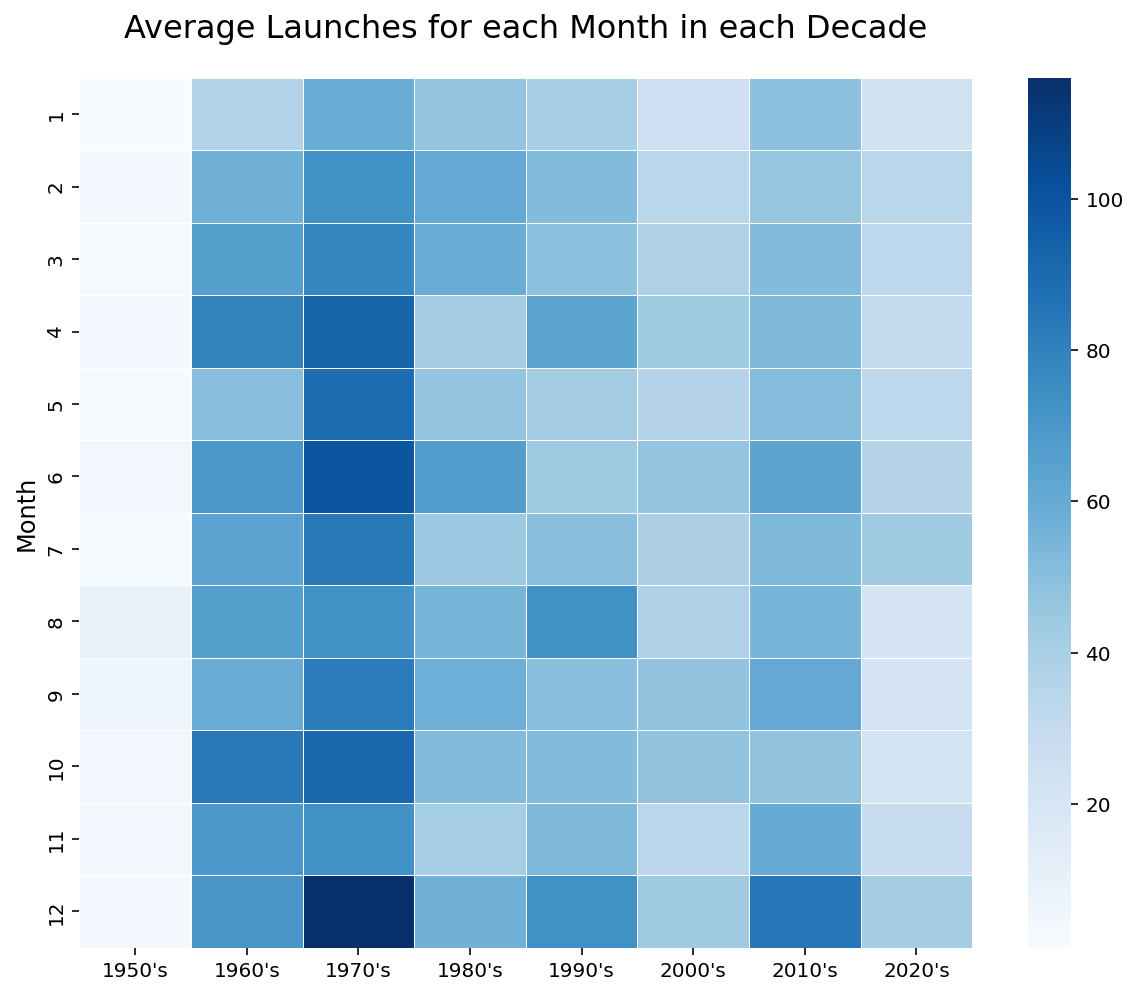

In [9]:
# Create a heat map to explore what are the most common months for launching
decade_month = space_missions[['Month', 'Decade']].copy()
decade_month['Count'] = 1
decade_month_grpd = decade_month.groupby(['Month', 'Decade'])['Count'].count().reset_index()
decade_month_grpd_uniform = decade_month_grpd.pivot('Month', 'Decade', 'Count')

sns.heatmap(decade_month_grpd_uniform, linewidths=.5, cmap="Blues")\
        
plt.title('Average Launches for each Month in each Decade', pad=20)
plt.xlabel(xlabel=None)
plt.ylabel('Month', fontsize = 12)
plt.show()

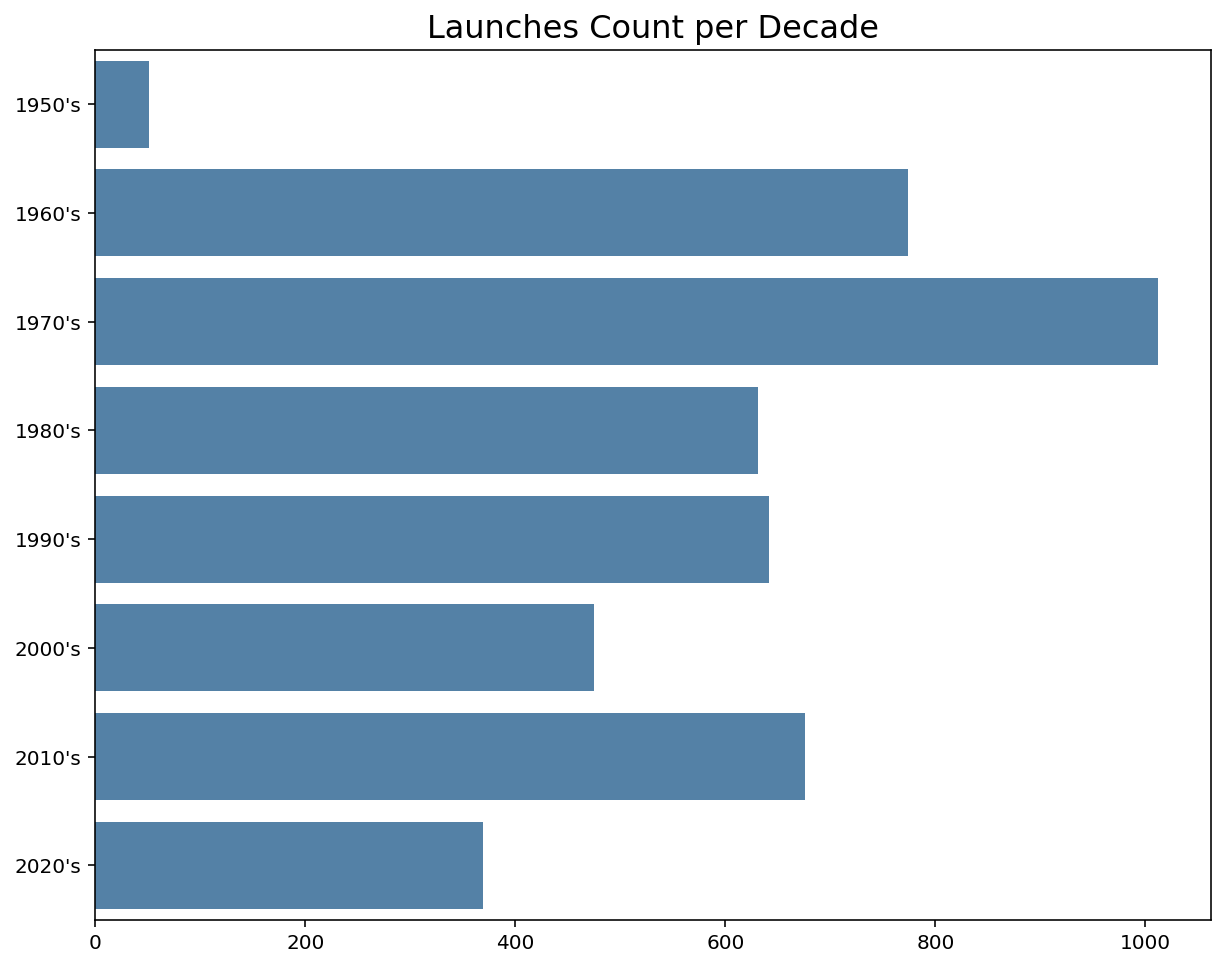

In [10]:
# Number of launches in each decade
sns.countplot(y='Decade', data=space_missions, color='steelblue')\
            .set(xlabel=None, ylabel=None, title='Launches Count per Decade')
plt.show()

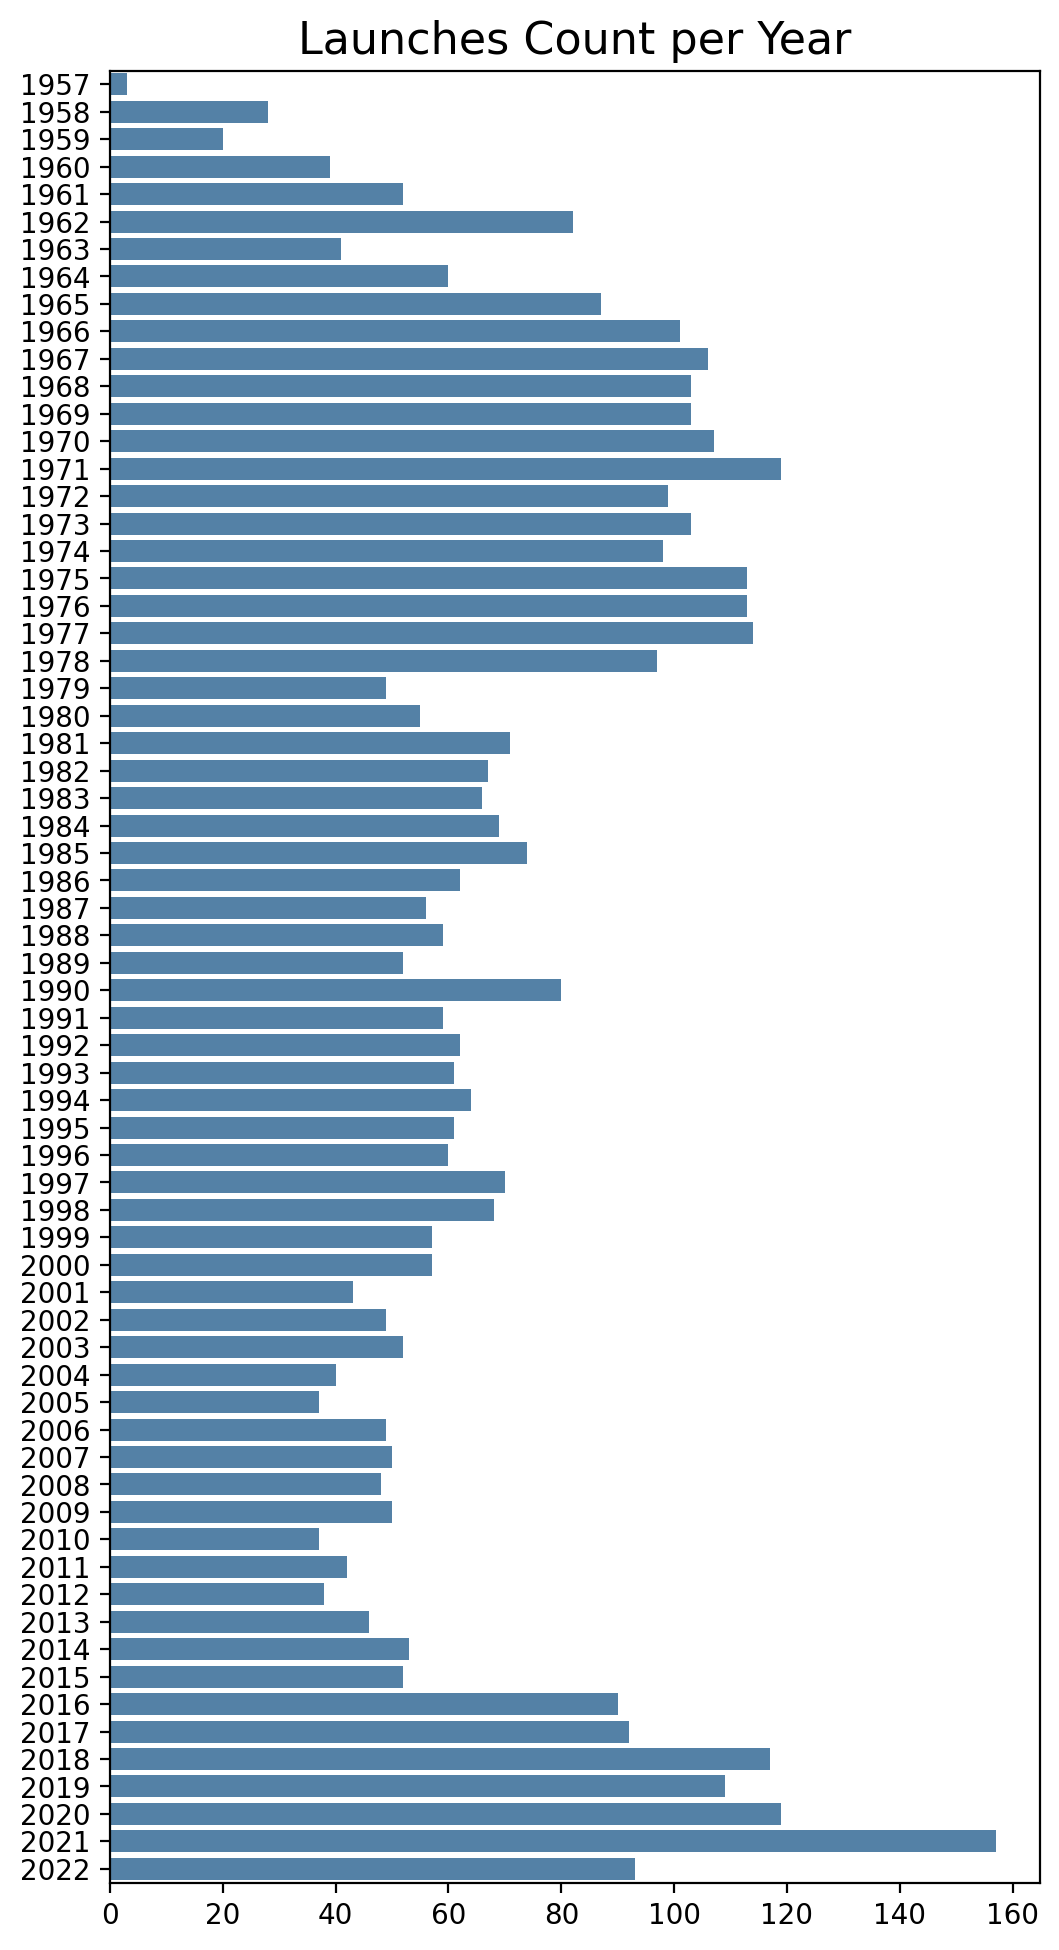

In [11]:
plt.figure(figsize=(6,12),dpi=100)
sns.countplot(y='Year', data=space_missions, color='steelblue')\
            .set(xlabel=None, ylabel=None, title='Launches Count per Year')
plt.show()

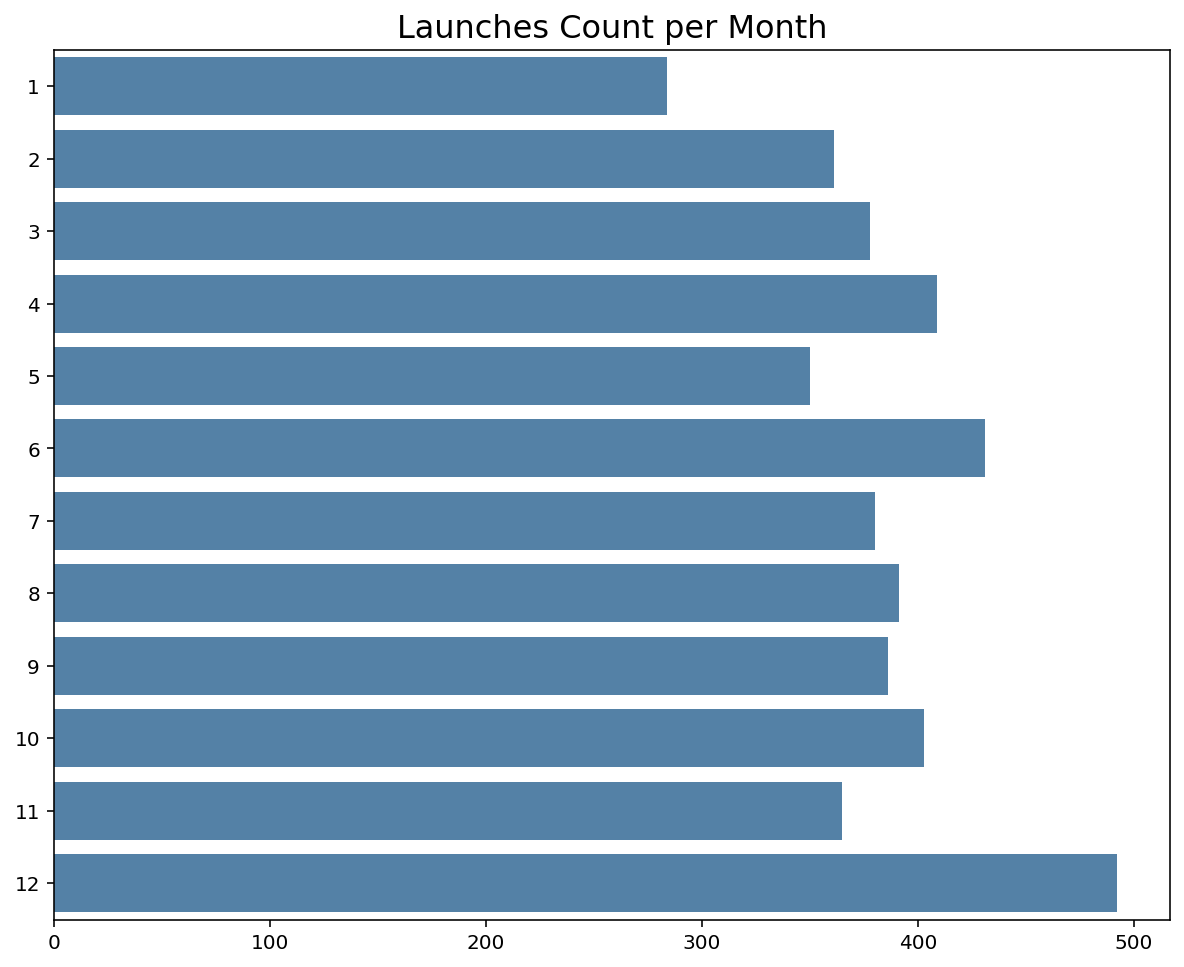

In [12]:
sns.countplot(y='Month', data=space_missions, color='steelblue')\
            .set(xlabel=None, ylabel=None, title='Launches Count per Month')
plt.show()

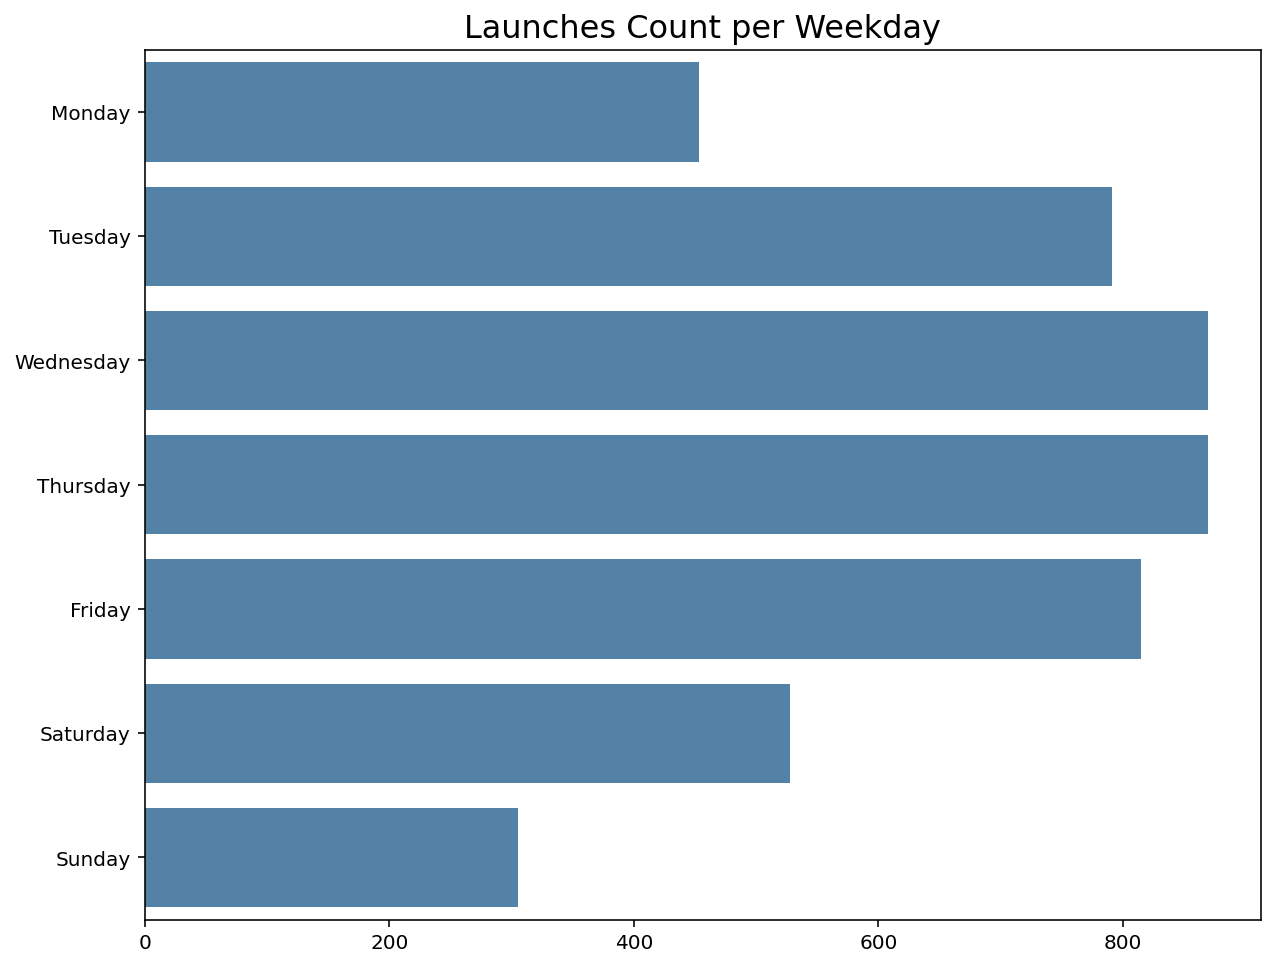

In [13]:
sns.countplot(y='DayName', data=space_missions, color='steelblue')\
            .set(xlabel=None, ylabel=None, title='Launches Count per Weekday')
plt.show()

* __For the next few plots, I will calculate the success rate of launches for each year and each decade in two new columns.__
* __Success Rate = Number of success launcher / (Total number of launcher) * 100__
 

In [14]:
# Calculate the success rate of mission status per decade
mission_rates_decade = space_missions[['Decade', 'MissionStatus']].copy()
mission_rates_decade = mission_rates_decade.groupby(['Decade','MissionStatus']).size().unstack(fill_value=0).reset_index()
mission_rates_decade['SuccessRateDecade'] = mission_rates_decade['Success'] / (mission_rates_decade['Success'] + mission_rates_decade['Failure'] + mission_rates_decade['Partial Failure'] + mission_rates_decade['Prelaunch Failure']) * 100
success_rates_decade = mission_rates_decade[['Decade', 'SuccessRateDecade']]

# Calculate the success rate of mission status per year
mission_rates_year = space_missions[['Year', 'MissionStatus']].copy()
mission_rates_year = mission_rates_year.groupby(['Year','MissionStatus']).size().unstack(fill_value=0).reset_index()
mission_rates_year['SuccessRateYear'] = mission_rates_year['Success'] / (mission_rates_year['Success'] + mission_rates_year['Failure'] + mission_rates_year['Partial Failure'] + mission_rates_year['Prelaunch Failure']) * 100
success_rates_year = mission_rates_year[['Year', 'SuccessRateYear']]

# Merge the two dataframes to move the newly created column 'SuccessRate' (in each decade) to the main dataframe 
space_missions = space_missions.merge(success_rates_decade, on='Decade', validate='many_to_one')\
                                .merge(success_rates_year, on='Year', validate='many_to_one')

space_missions.dtypes

Company                      object
Location                     object
Date                 datetime64[ns]
Time                         object
Rocket                       object
Mission                      object
RocketStatus                 object
Price                       float64
MissionStatus                object
Year                          int64
Month                         int64
DayName                    category
Decade                     category
Country                      object
SuccessRateDecade           float64
SuccessRateYear             float64
dtype: object

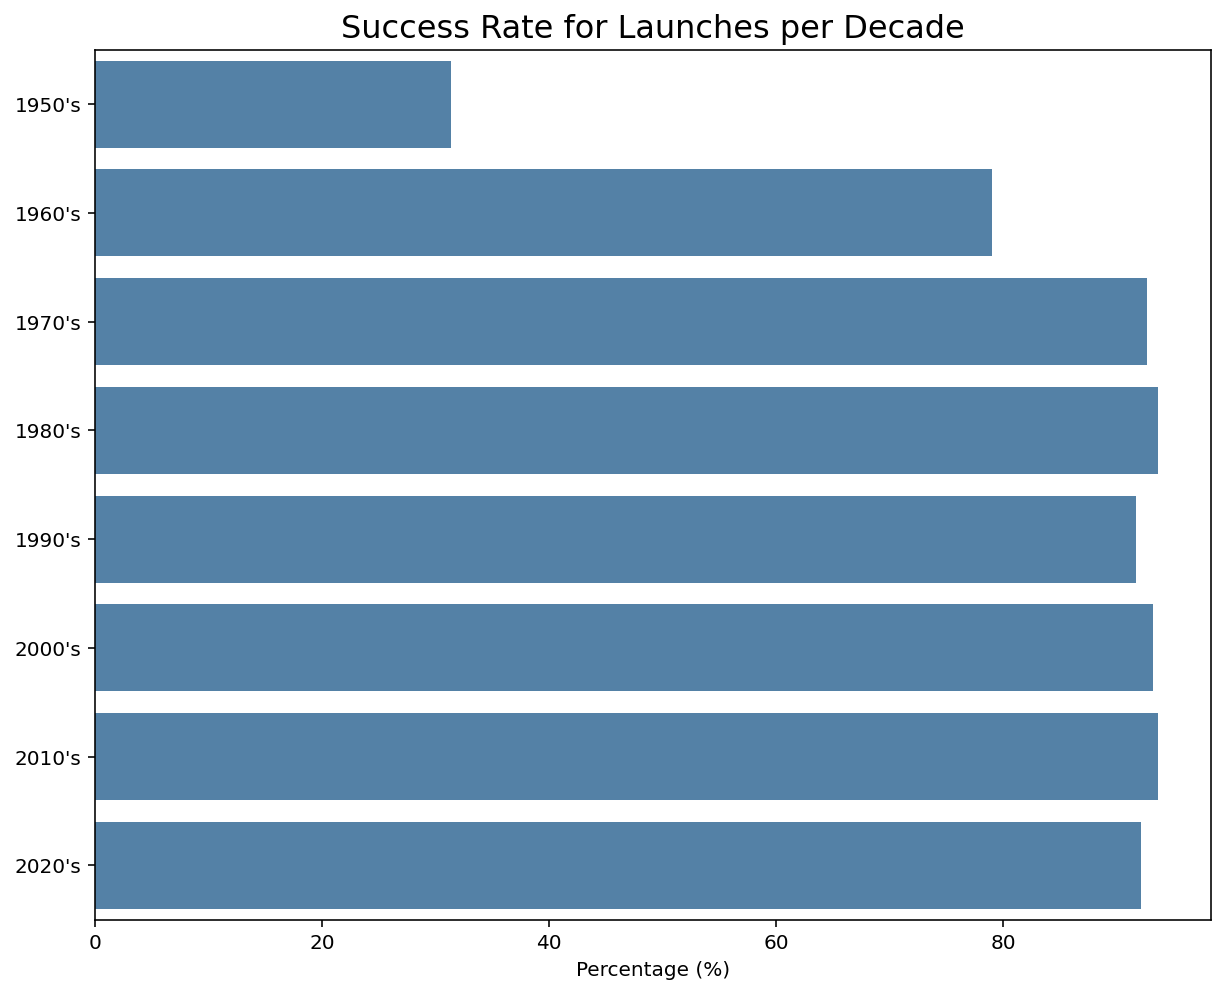

In [15]:
# Success rate for launches per decade
sns.barplot(y='Decade', x='SuccessRateDecade', data=space_missions, color='steelblue')\
            .set(xlabel='Percentage (%)', ylabel=None, title='Success Rate for Launches per Decade')
plt.show()

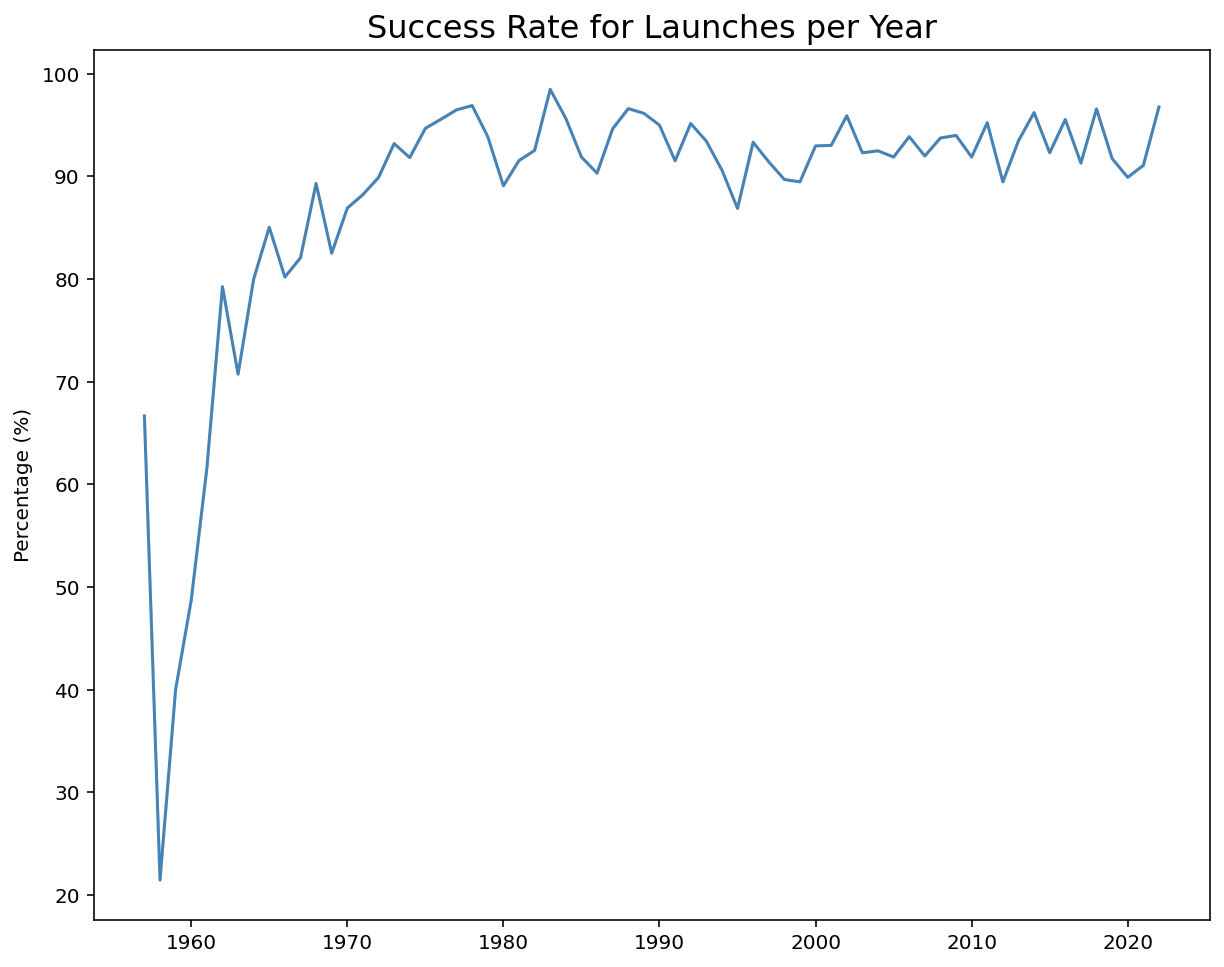

In [16]:
# Success rate for launches per year
sns.lineplot(x='Year', y='SuccessRateYear', data=space_missions,  color='steelblue')\
            .set(xlabel=None, ylabel='Percentage (%)', title='Success Rate for Launches per Year')
plt.show()

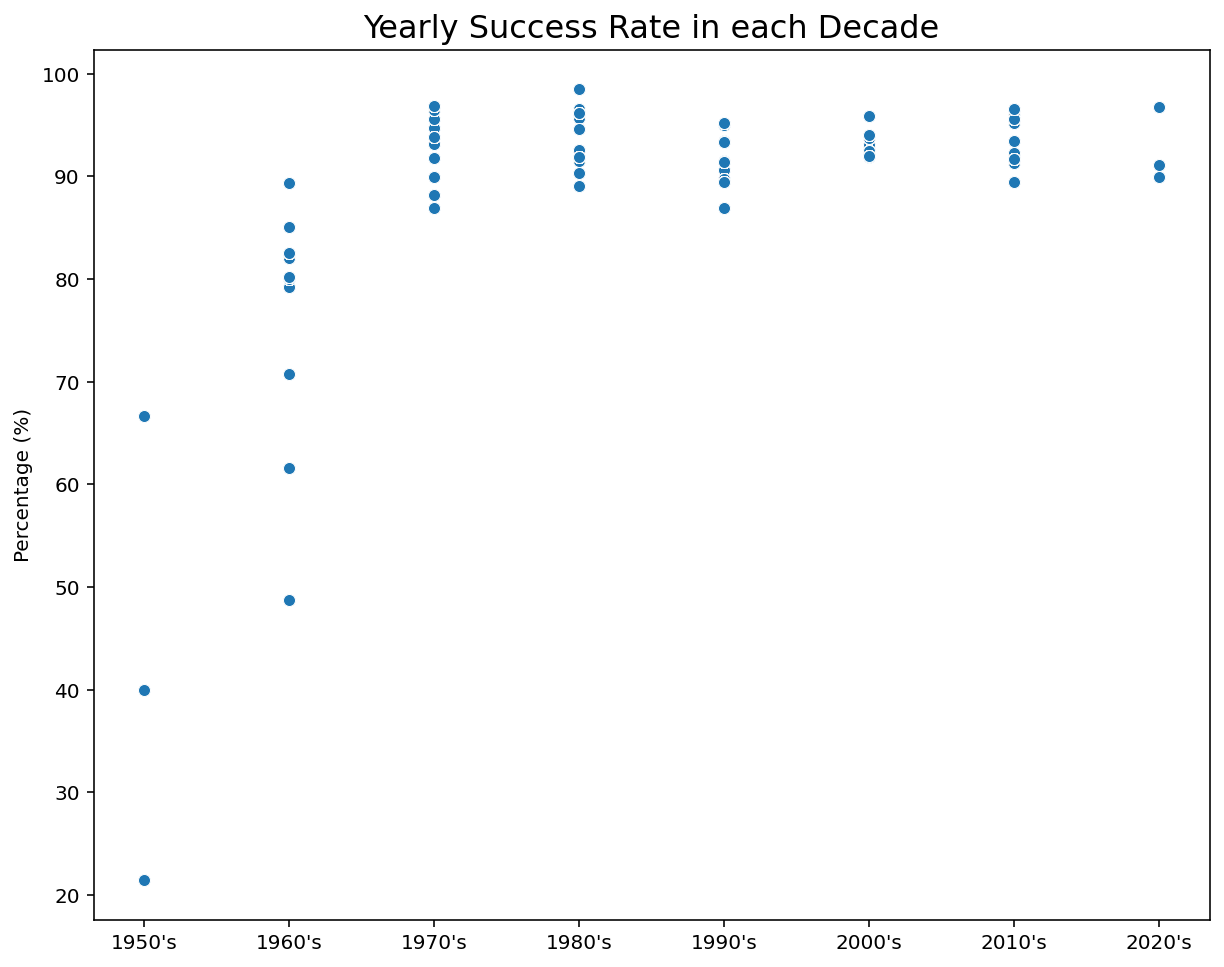

In [17]:
# Yearly success rate in each decade
sns.scatterplot(x='Decade', y='SuccessRateYear', data=space_missions)\
            .set(xlabel=None, ylabel='Percentage (%)', title='Yearly Success Rate in each Decade')
plt.show()

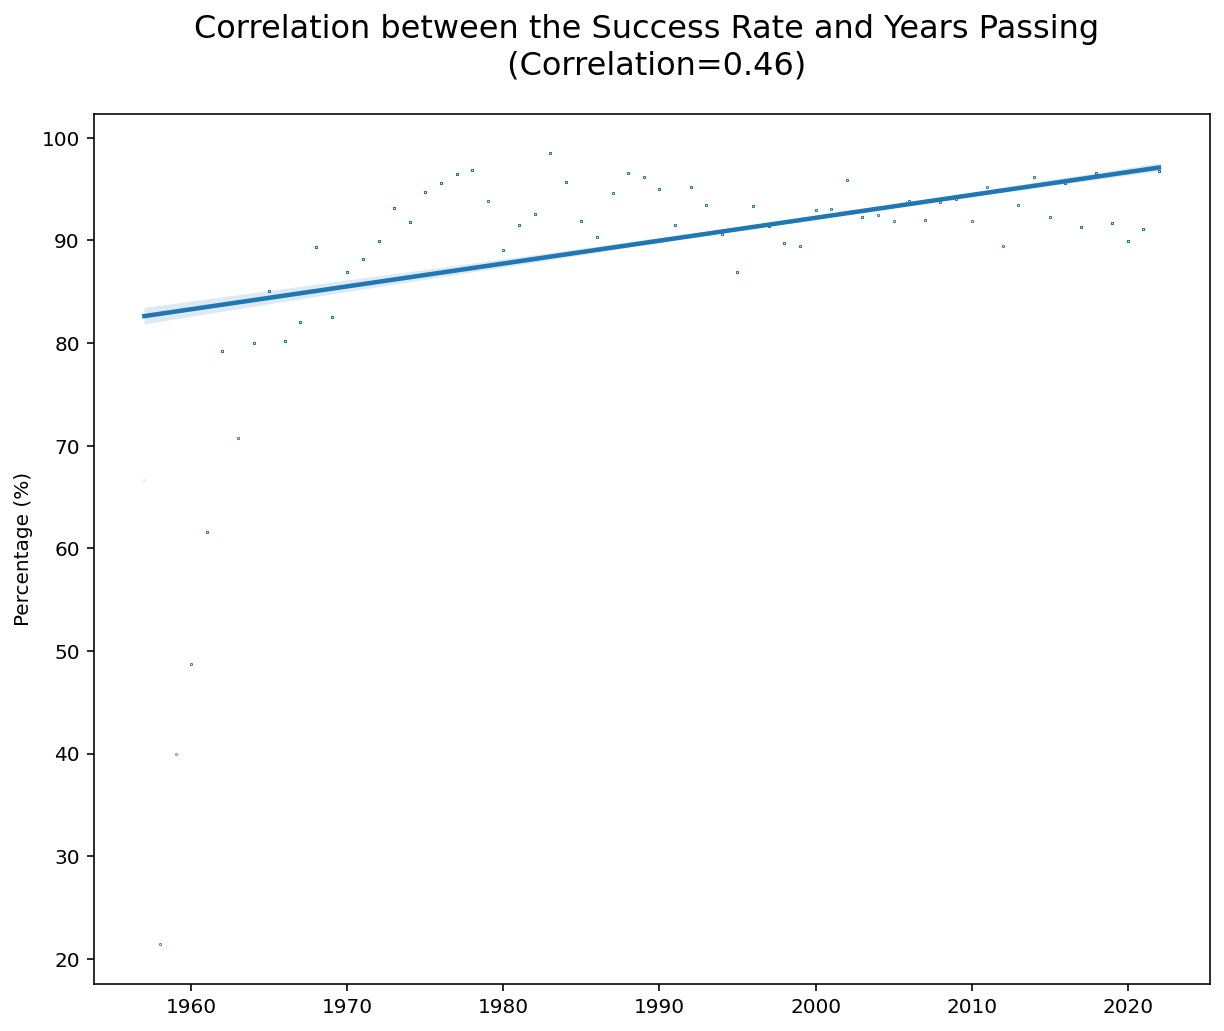

In [18]:
# Plot the correlation between the success rate each year and years passing

corr = space_missions['SuccessRateYear'].corr(space_missions['Year']).round(2)

sns.regplot(x='Year', y='SuccessRateYear', data=space_missions, scatter_kws={'s':0.001})\
            .set(xlabel=None, ylabel='Percentage (%)')
plt.title(f'Correlation between the Success Rate and Years Passing \n (Correlation={corr})', fontsize=16, pad=20)
plt.show()

### Notes from the above plots:
* The seventies was when the most missions took place. Then the number of launches dcreased for almost 30 years, and startes to rise again from 2015 till now (August 2022).
* The launches usually happen during weekdays, espicialy Wednesday. Unlike in the weeekends, especially Sunday where launches rarely happen.
* Success rate for launches was low in the fifties and sixties, but has kept a steady rate since the seventies till now. 
* The is a moderate positive correlation (0.46) between success rate and years passing.

## Plotting some graphs related to the countries in which the launches took place:
* __But first, I will calculate the success rate of launches for each country in every year and decade in two new columns.__
* __Success Rate = Number of success launcher / (Total number of launcher) * 100__
* __To make the analysis easier to comprehend, I will focus on the top five countries, and mill combine the rest of the countries under one name 'Other'.__

In [19]:
# Create a column which contains the top 5 countries, and has the rest of the countries under 'Other'
space_missions['CountryOther'] =  space_missions['Country']
top5 = ['USA', 'Russia/USSR', 'Kazakhstan', 'China', 'France']
space_missions.loc[~space_missions['CountryOther'].isin(top5), 'CountryOther'] = 'Other' 

# Arrange the top 5 countries according to number of launches to make sure the plots keep them in that order
countries_order = ['Russia/USSR', 'USA', 'China', 'France', 'Kazakhstan', 'Other']
space_missions['CountryOther'] = pd.Categorical(space_missions['CountryOther'], countries_order)

space_missions['CountryOther'].value_counts()

Russia/USSR    1997
USA            1472
China           368
Other           334
France          318
Kazakhstan      141
Name: CountryOther, dtype: int64

In [20]:
# Calculate the success rate of mission status per country
mission_rates_country = space_missions[['CountryOther', 'MissionStatus']].copy()
mission_rates_country = mission_rates_country.groupby(['CountryOther','MissionStatus']).size().unstack(fill_value=0).reset_index()
mission_rates_country['SuccessRateCountry'] = mission_rates_country['Success'] / (mission_rates_country['Success'] + mission_rates_country['Failure'] + mission_rates_country['Partial Failure'] + mission_rates_country['Prelaunch Failure']) * 100
mission_rates_country = mission_rates_country[['CountryOther', 'SuccessRateCountry']]

# Calculate the success rate of mission status per country per decade
mission_rates_ctry_dc = space_missions[['CountryOther', 'Decade', 'MissionStatus']].copy()
mission_rates_ctry_dc = mission_rates_ctry_dc.groupby(['CountryOther','Decade', 'MissionStatus']).size().unstack(fill_value=0).reset_index()
mission_rates_ctry_dc['SuccessRateCountryDecade'] = mission_rates_ctry_dc['Success'] / (mission_rates_ctry_dc['Success'] + mission_rates_ctry_dc['Failure'] + mission_rates_ctry_dc['Partial Failure'] + mission_rates_ctry_dc['Prelaunch Failure']) * 100
mission_rates_ctry_dc = mission_rates_ctry_dc[['CountryOther', 'Decade', 'SuccessRateCountryDecade']]

# Merge the two dataframes to move the newly created column 'SuccessRate' (in each decade) to the main dataframe 
space_missions = space_missions.merge(mission_rates_country, on='CountryOther', validate='many_to_one')\
                                .merge(mission_rates_ctry_dc, on=['CountryOther', 'Decade'], validate='many_to_one')

space_missions.dtypes

Company                             object
Location                            object
Date                        datetime64[ns]
Time                                object
Rocket                              object
Mission                             object
RocketStatus                        object
Price                              float64
MissionStatus                       object
Year                                 int64
Month                                int64
DayName                           category
Decade                            category
Country                             object
SuccessRateDecade                  float64
SuccessRateYear                    float64
CountryOther                      category
SuccessRateCountry                 float64
SuccessRateCountryDecade           float64
dtype: object

In [21]:
# Create a dictionary of colors for each country to standardize the color in the following plots
country_color = {'USA':'mediumblue',
                 'Russia/USSR':'darkgreen',
                 'Kazakhstan':'slategrey',
                 'China':'darkorange',
                 'France':'violet',
                 'Other':'goldenrod'}

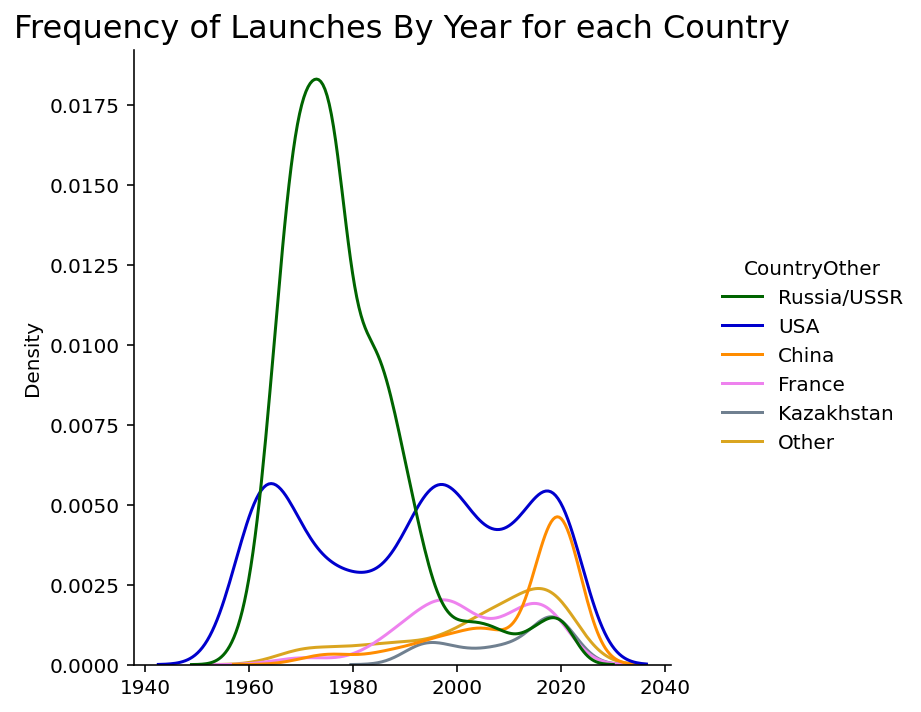

In [22]:
# Plot the distribution of yearly launches for each Country
sns.displot(x='Year', data=space_missions,  kind='kde', hue='CountryOther', palette=country_color)\
            .set(xlabel=None, ylabel='Density', title='Frequency of Launches By Year for each Country')
plt.show()

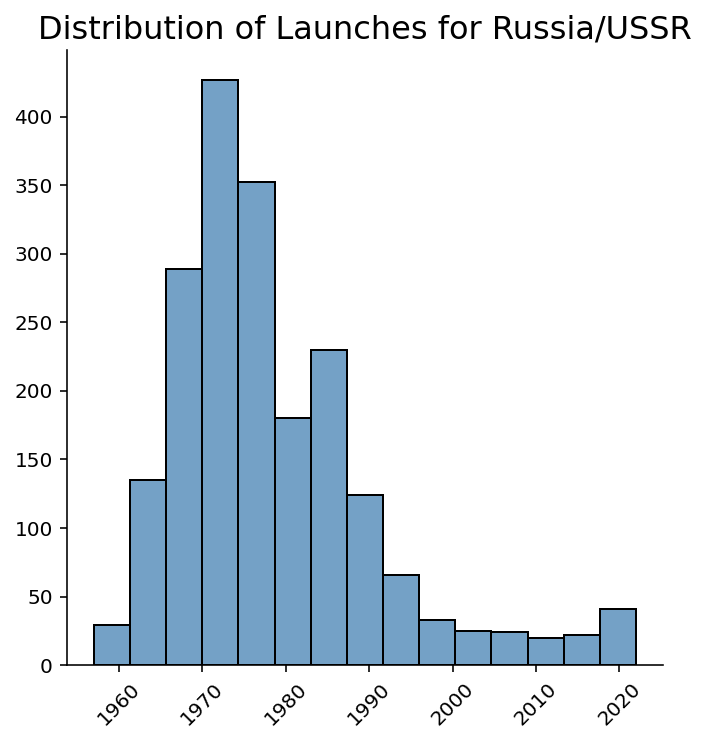

In [23]:
# Plot the distribution of launches for Russia/USSR
space_missions_russia = space_missions[space_missions['Country'] == 'Russia/USSR']
sns.displot(x='Year', data=space_missions_russia, color='steelblue', bins=15)\
            .set(xlabel=None, ylabel=None, title='Distribution of Launches for Russia/USSR')
plt.xticks(rotation=45)
plt.show()

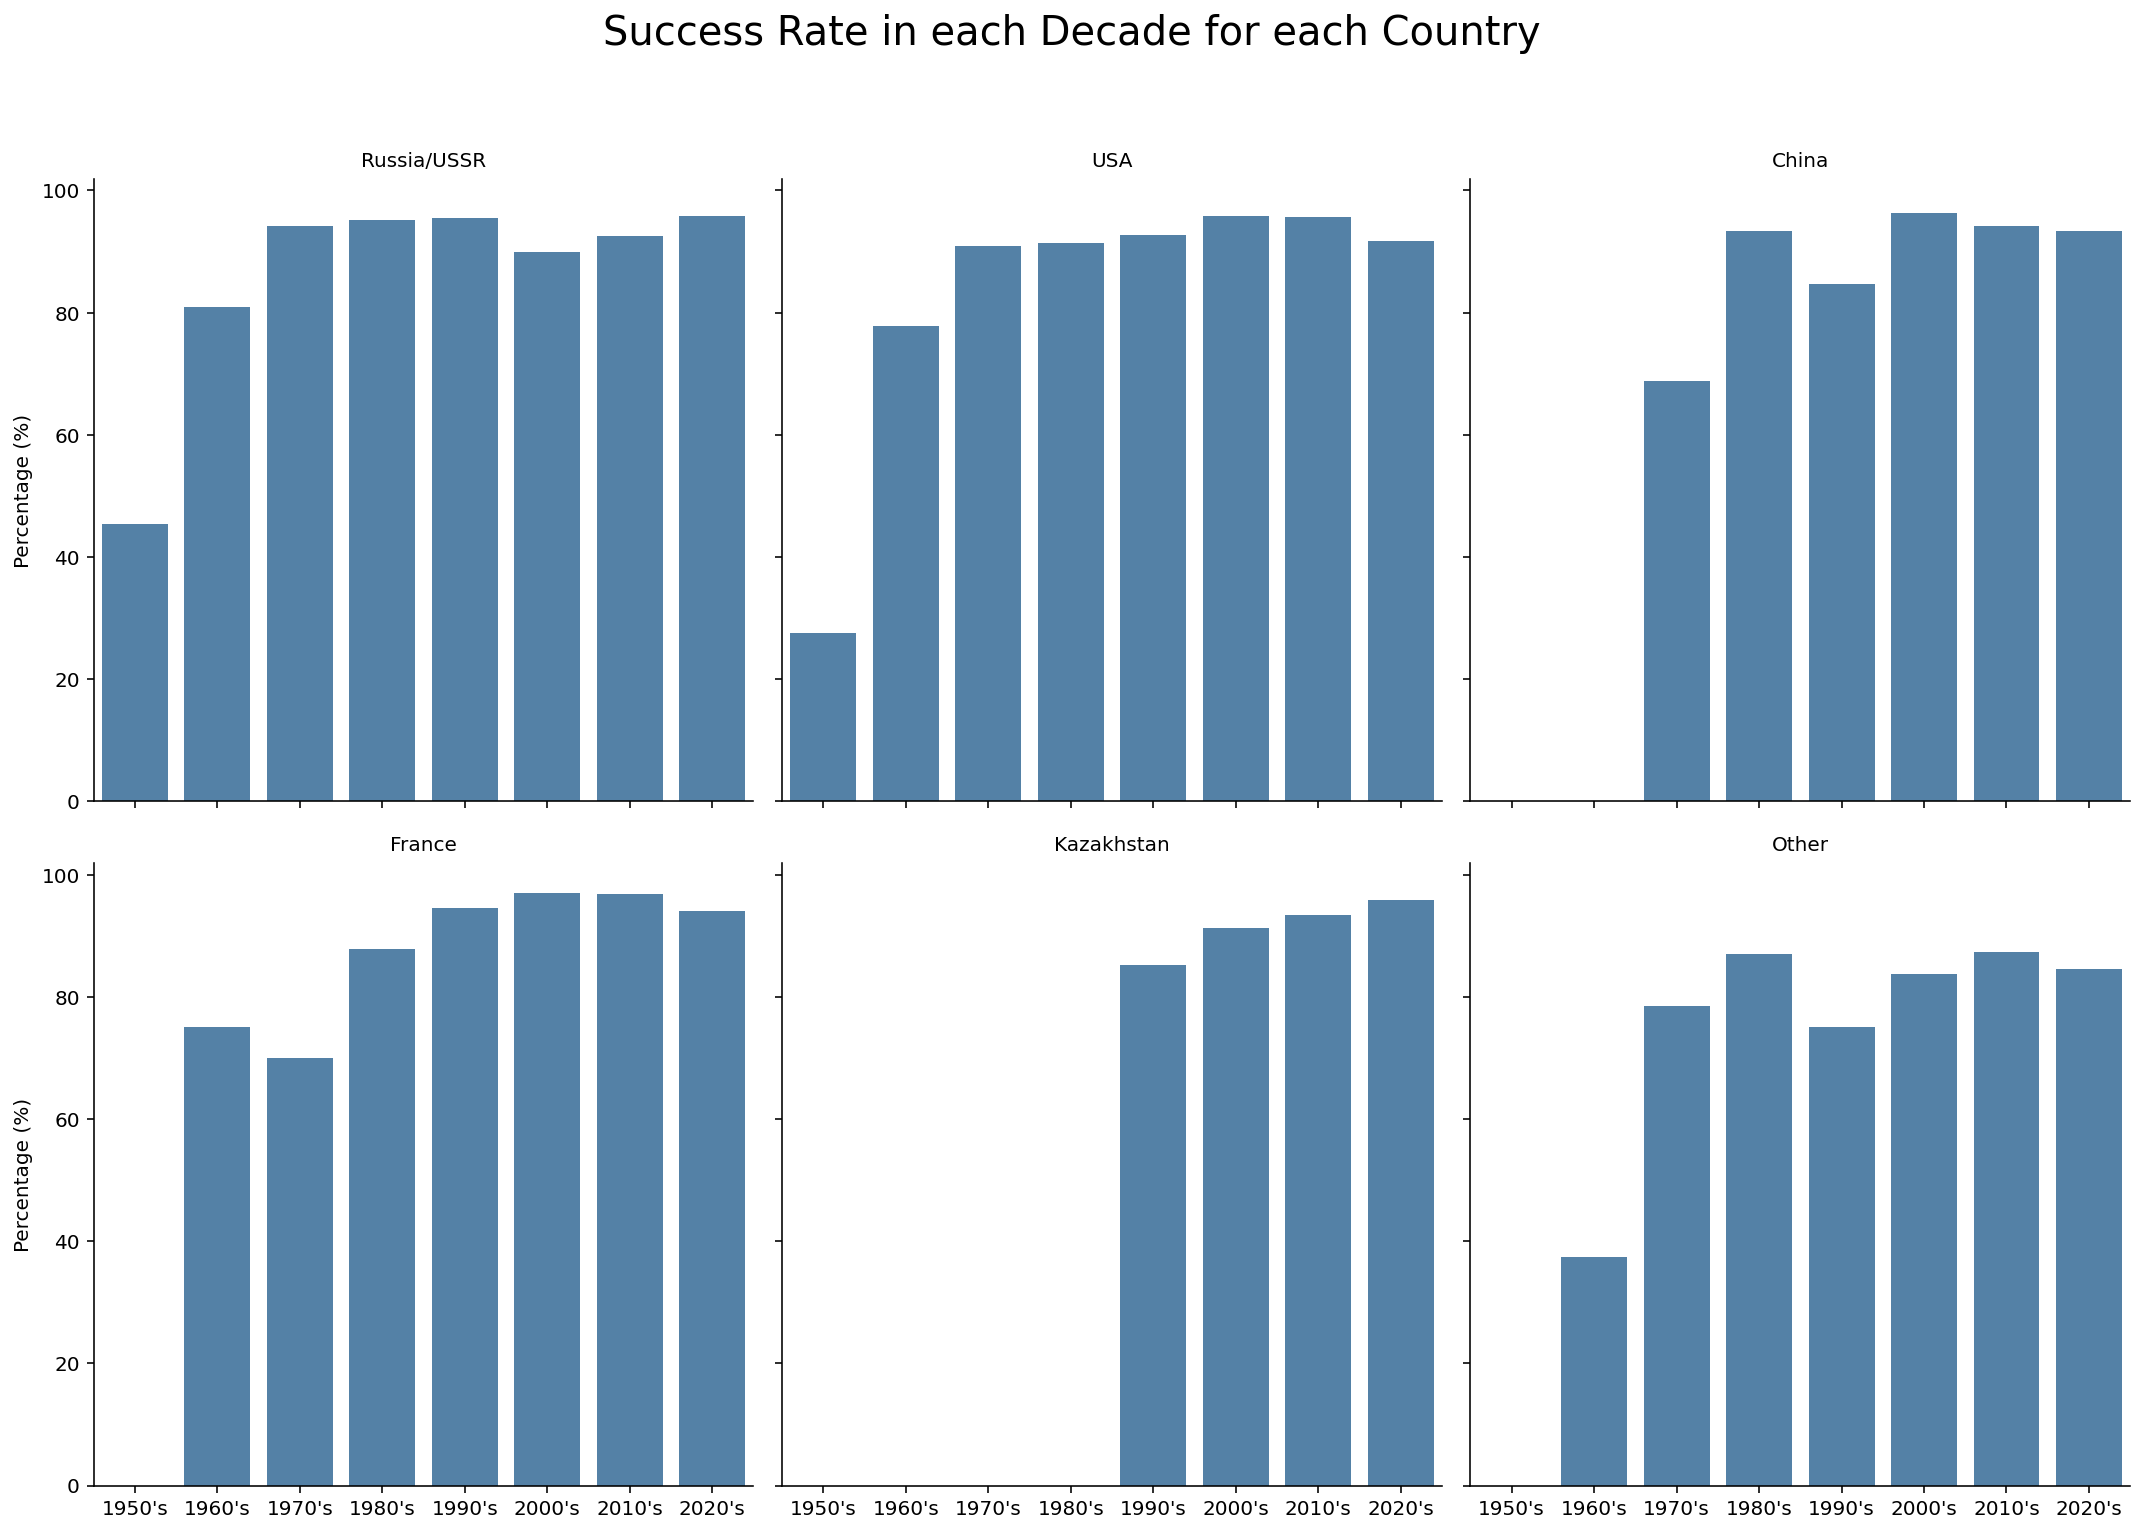

In [24]:
# Plot the success rate in each decade for each country
sns.catplot(kind='bar', x='Decade', y='SuccessRateCountryDecade', data=space_missions, color= 'steelblue', col='CountryOther', col_wrap=3)\
    .set_titles("{col_name}").set_axis_labels("", "Percentage (%)")
plt.suptitle('Success Rate in each Decade for each Country', fontsize=20, y=1.08)
plt.show()

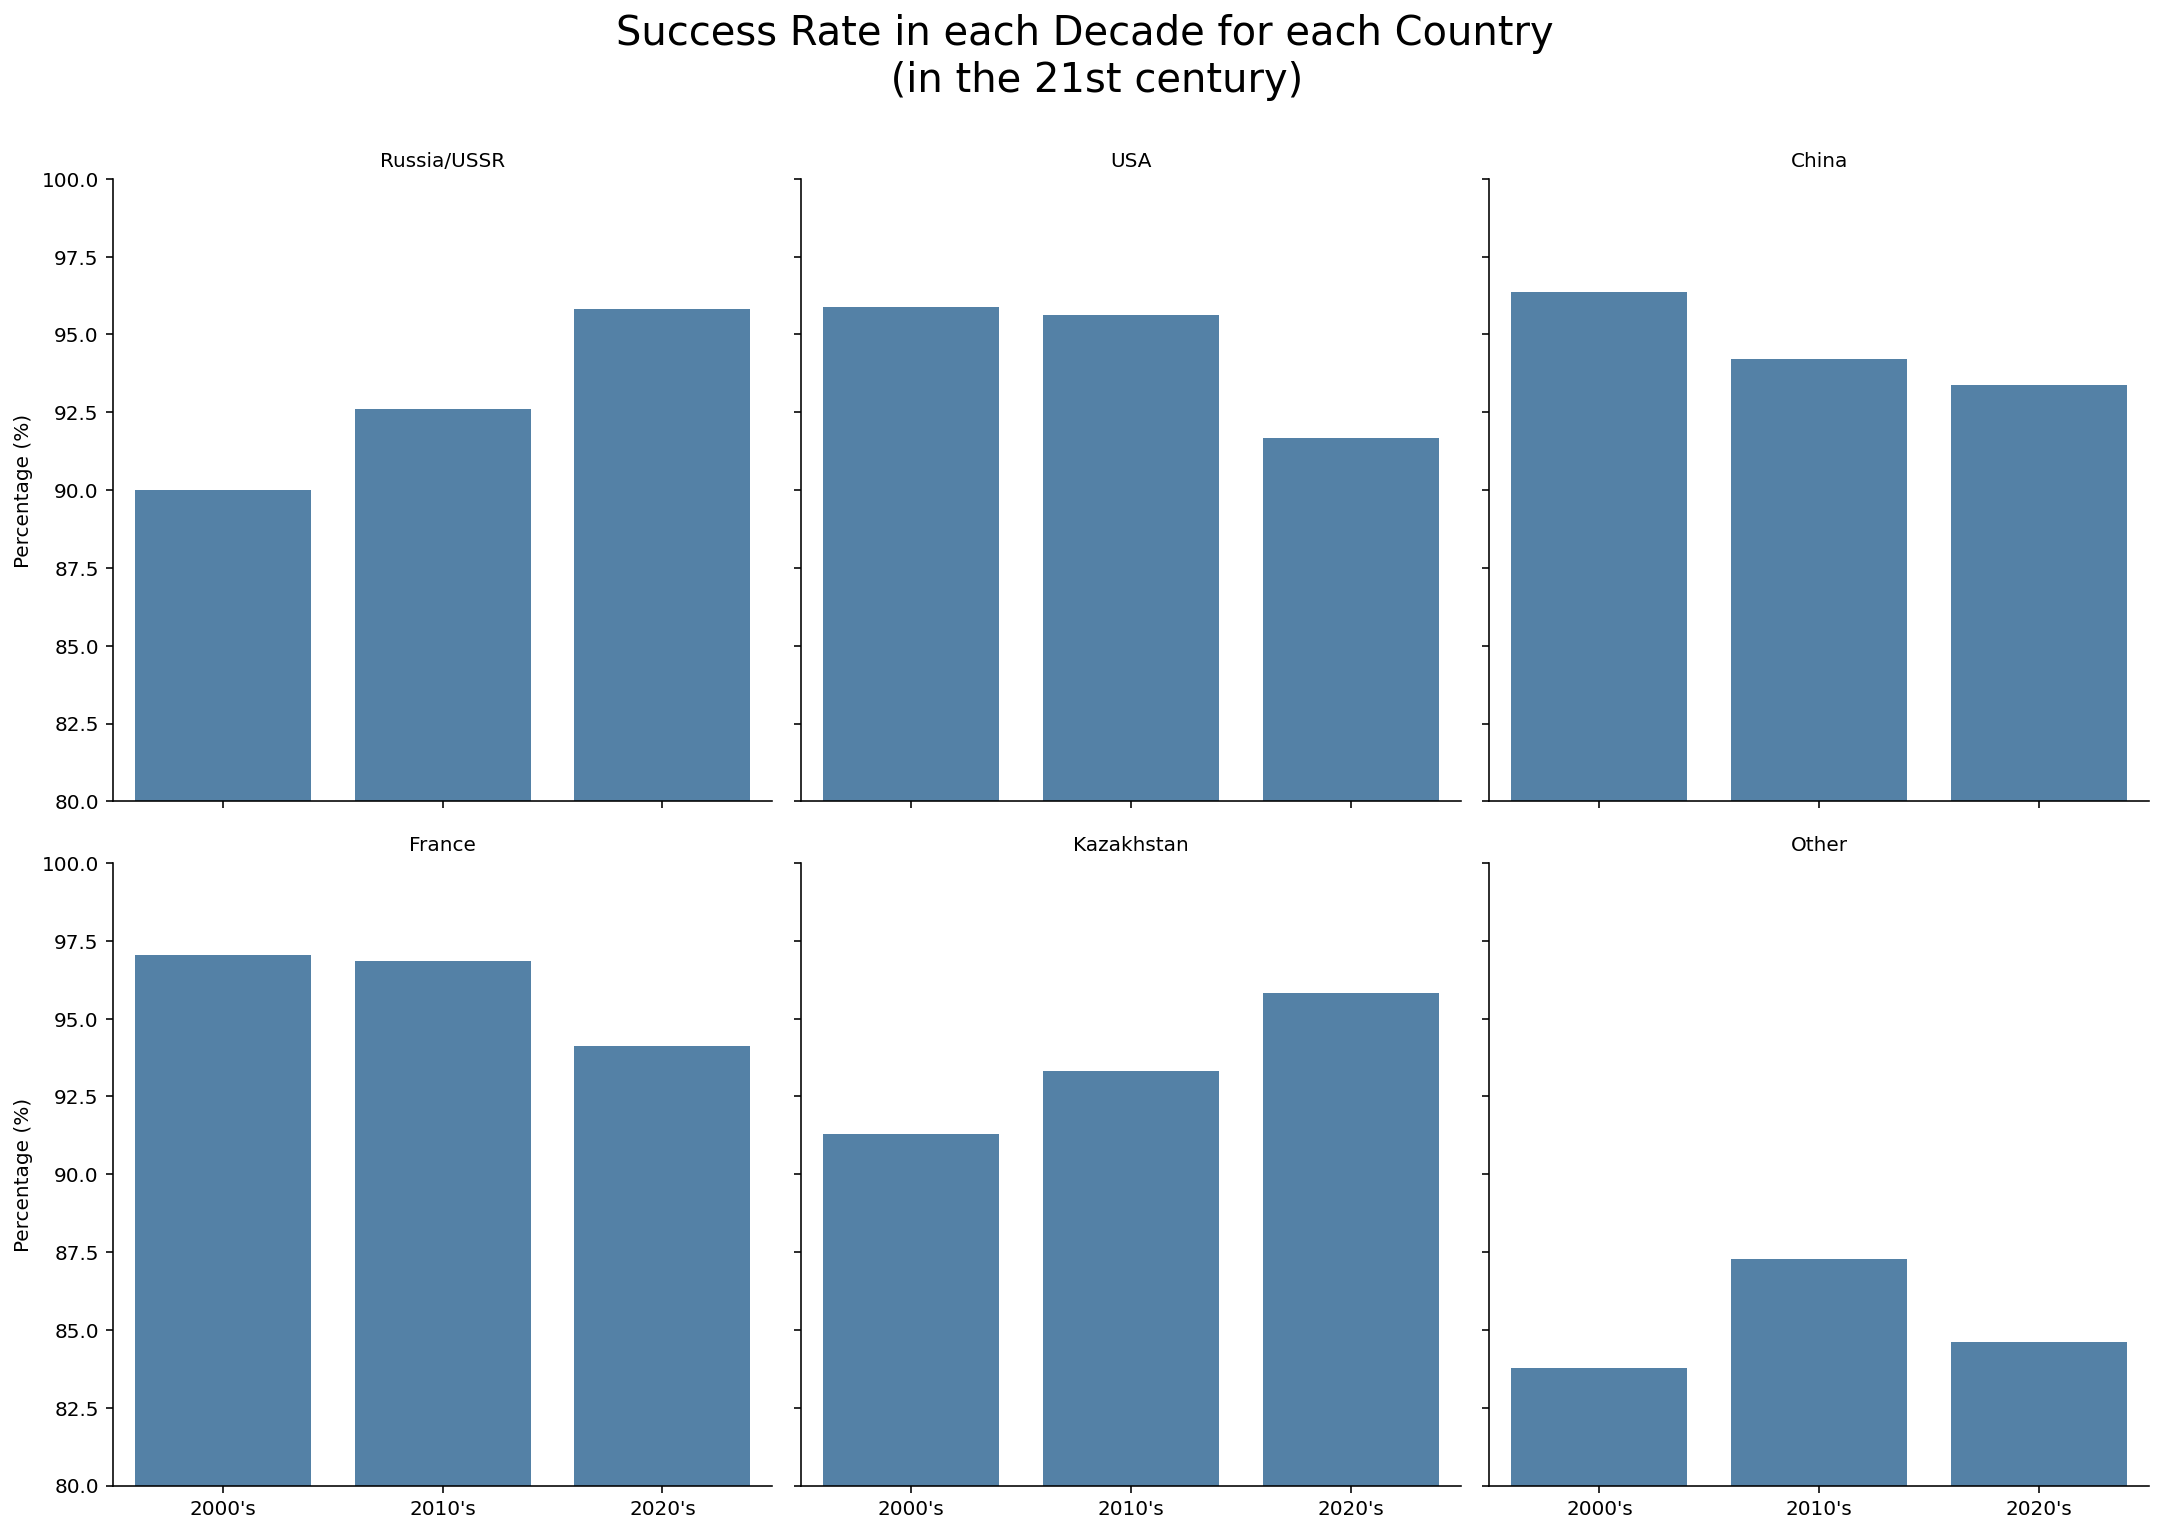

In [25]:
# Focus on the 21st century, plot the success rate in each decade for each country
space_missions_nmil = space_missions[space_missions['Year'] >= 2000].copy()
space_missions_nmil['Decade'] = space_missions_nmil['Decade'].cat.remove_unused_categories()

sns.catplot(kind='bar', x='Decade', y='SuccessRateCountryDecade', data=space_missions_nmil, color= 'steelblue', col='CountryOther', col_wrap=3)\
    .set_titles("{col_name}").set_axis_labels("", "Percentage (%)")
plt.suptitle('Success Rate in each Decade for each Country \n (in the 21st century)', fontsize=20, y=1.08)
plt.ylim(80, 100)
plt.show()

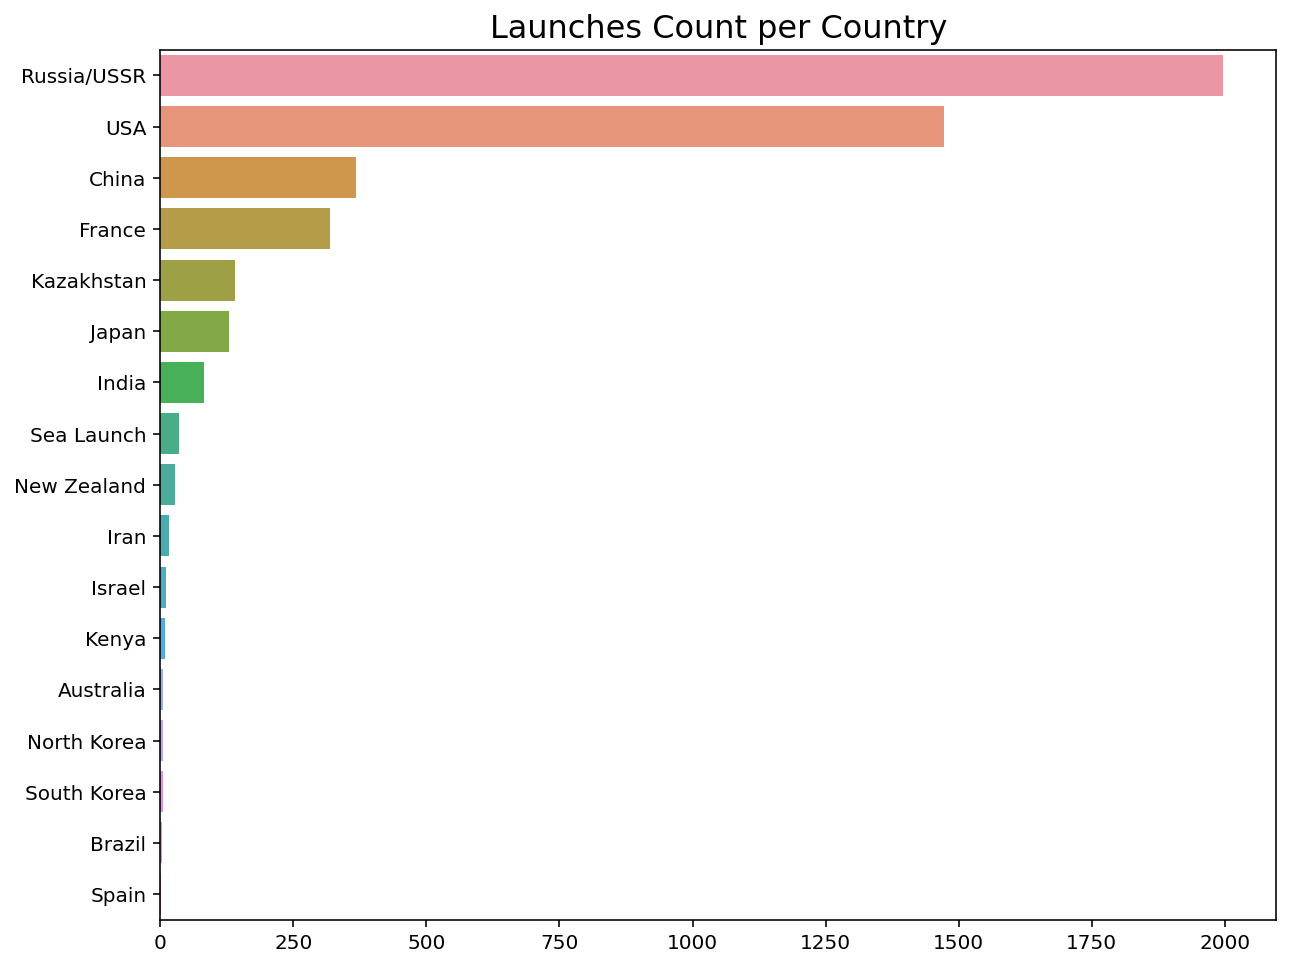

In [26]:
# Plot total number of launcher per country
sns.countplot(y='Country', data=space_missions, order=space_missions['Country'].value_counts().index)\
            .set(xlabel=None, ylabel=None, title='Launches Count per Country')
plt.show()

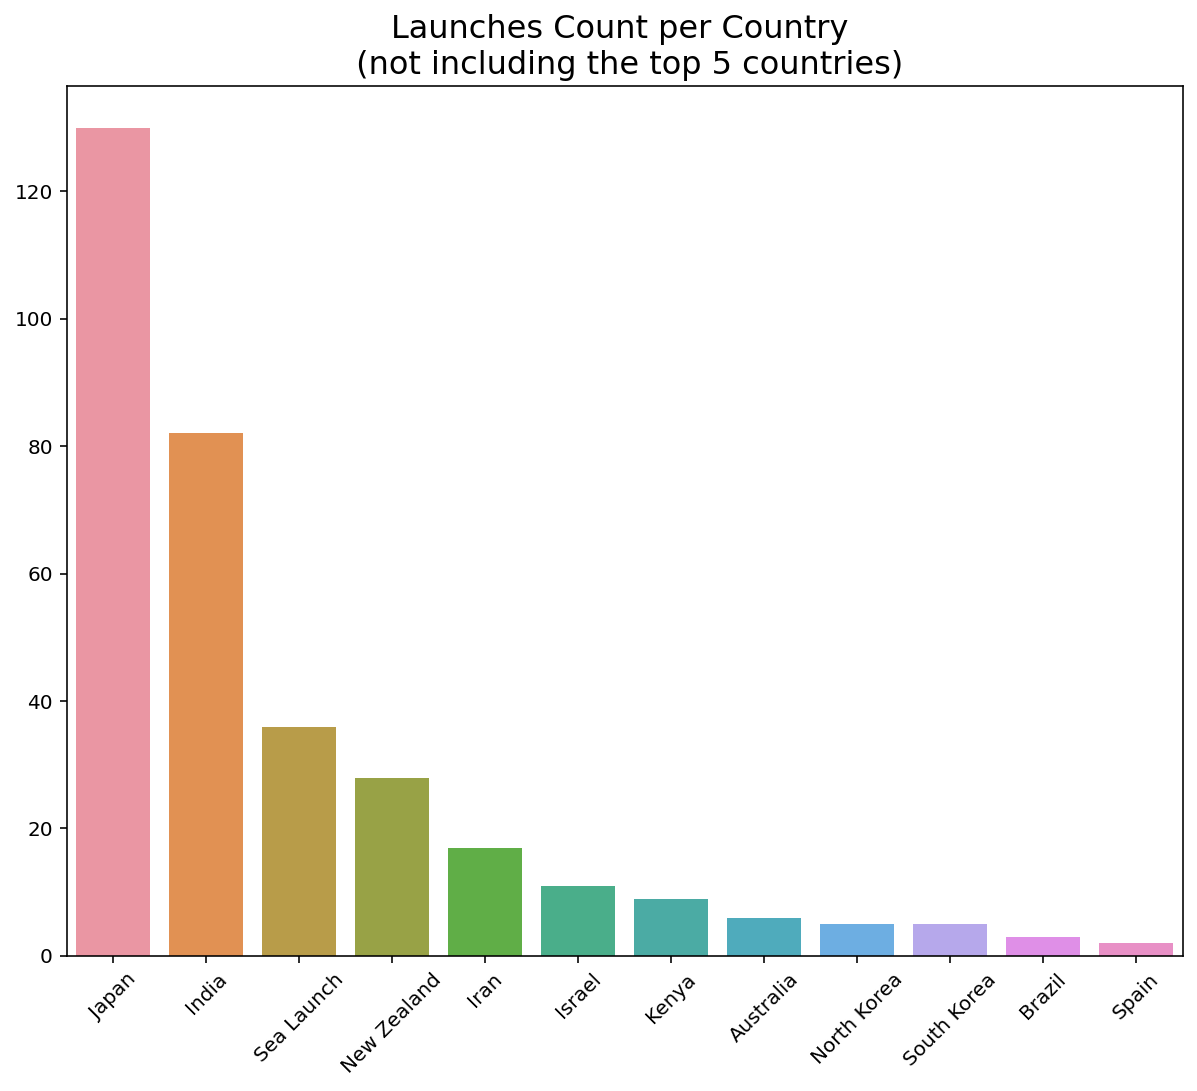

In [27]:
# To make it more clear, I will plot count of launches for all countries after excluding the top 5 countries 
space_missions_not_top = space_missions[~space_missions['Country'].isin(top5)]

sns.countplot(x='Country', data=space_missions_not_top, order=space_missions_not_top['Country'].value_counts().index)\
            .set(xlabel=None, ylabel=None, title='Launches Count per Country \n (not including the top 5 countries)')
plt.xticks(rotation=45)
plt.show()

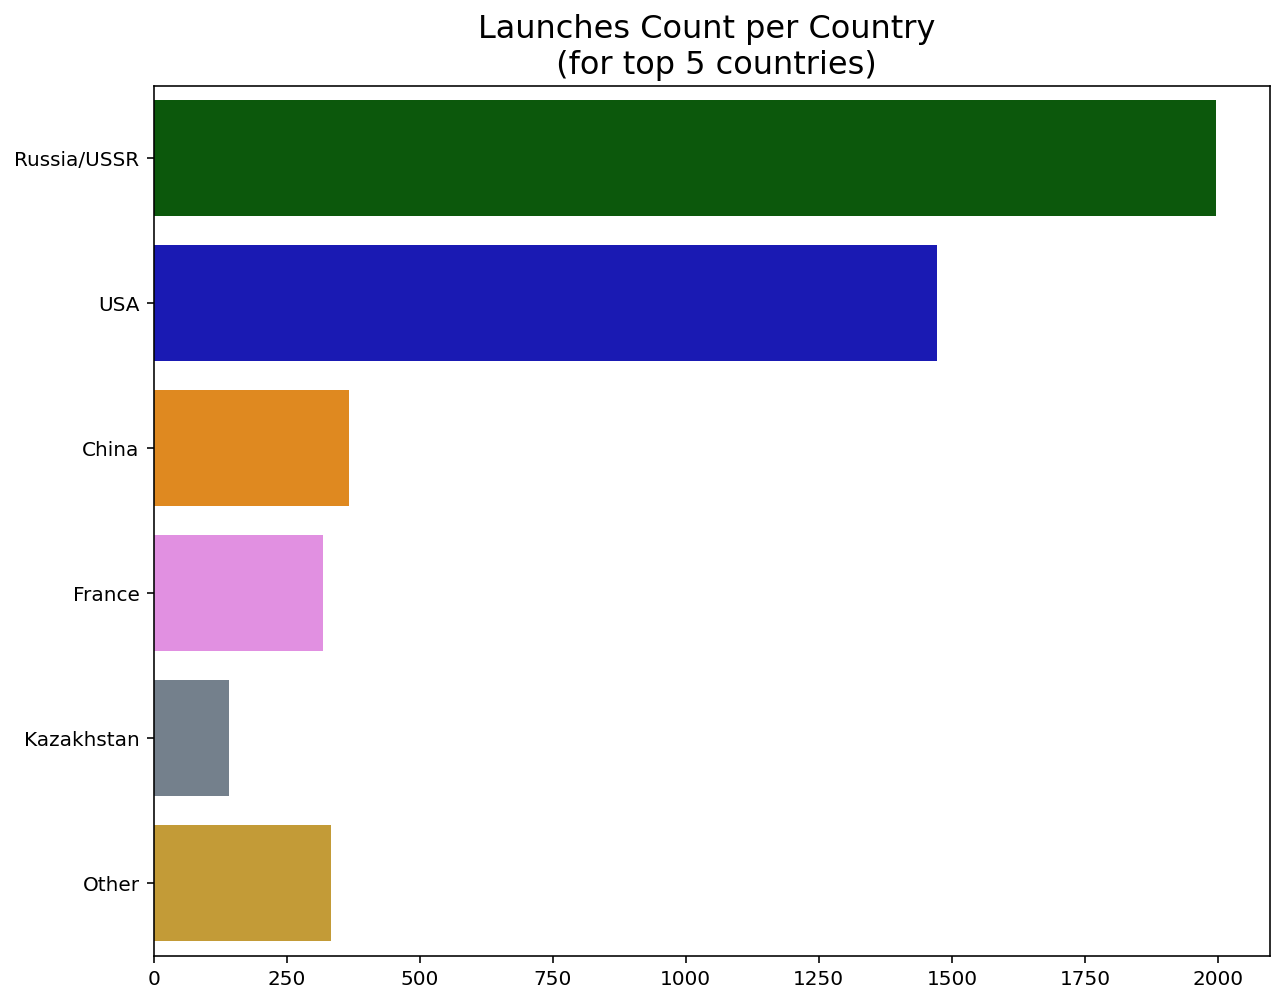

In [28]:
# Count of launches for the top 5 countries 
sns.countplot(y='CountryOther', data=space_missions, palette=country_color)\
            .set(xlabel=None, ylabel=None, title='Launches Count per Country \n (for top 5 countries)')
plt.show()

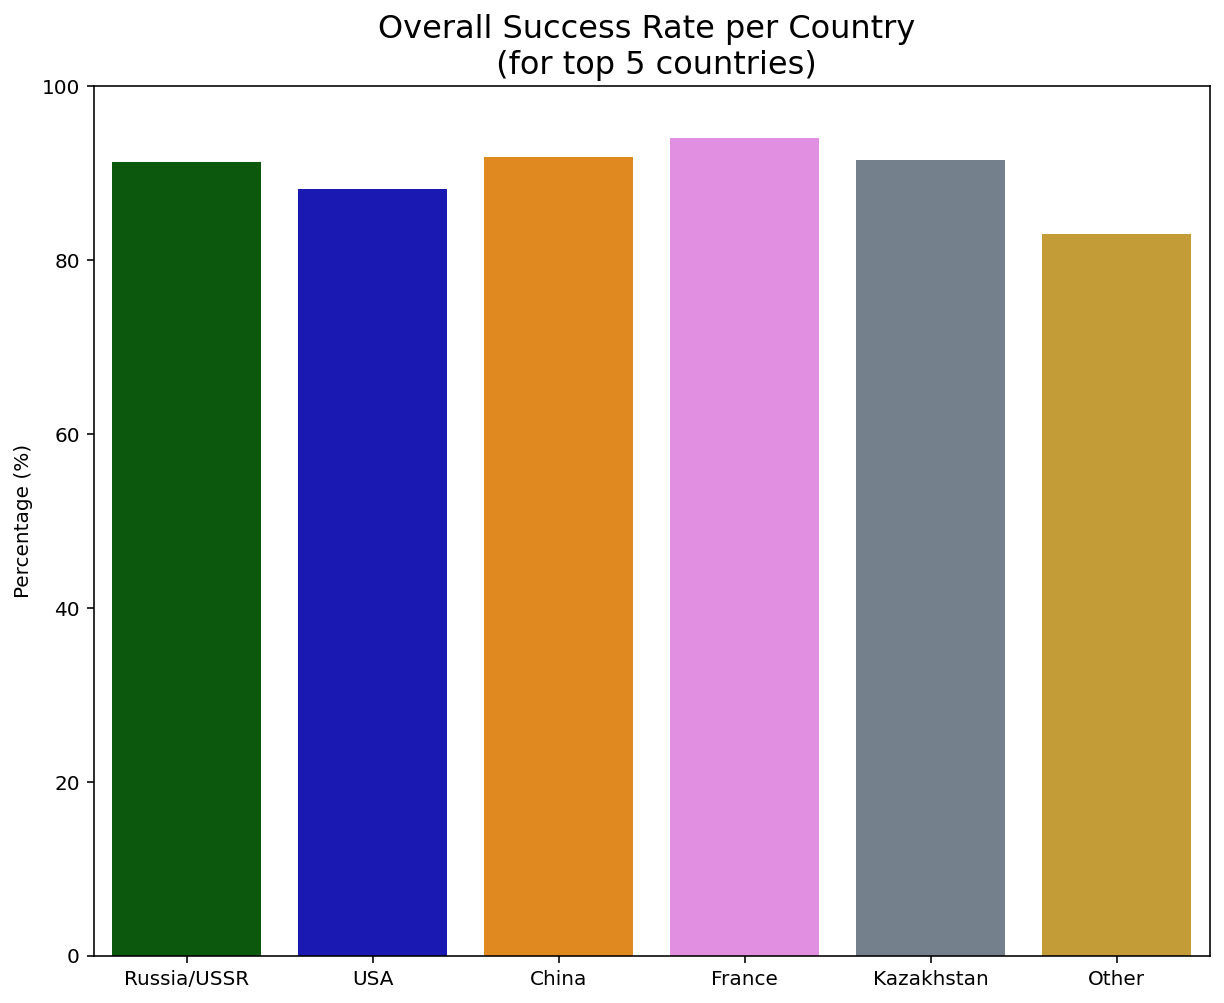

In [29]:
# Success rate of launches for the top 5 countries 
sns.barplot(x='CountryOther', y='SuccessRateCountry', data=space_missions, palette=country_color)\
            .set(ylim=(0, 100), xlabel=None, ylabel='Percentage (%)', title='Overall Success Rate per Country \n (for top 5 countries)')
plt.show()

### Notes from the above plots:
* Russia/USSR has the highest number of space mission launches, espicially in the seventies.
* After the dissolution of the USSR, number of launcher by Russia decreased significantly, and it still hasn not rised till now.
* Even though China entered the space race late compared to other countries (in the seventies), it was able to catch up and beat France (which startes a decade earlies), and is now the third country when it comes to the overall number of launches. But still far behind the first two countries (USA & Russia).
* The overall success rate is almost the same among the top 5 countries, with the USA being slightly lower. But when comparing the success rate during the 21st century, USA is not lower than the rest.

## Plotting some graphs related to price of missions:
* __Unfortunately, only 1265 mission out of the 4630 had its price listed, which is only around 27%. So, there is not enough data to make any inferences.__
* __In the next plots, we can see that USA spends the most amount of money in its missions, with a huge difference bewteen it and Russia/USSR, even though number of mission launches for Russia/USSR is a little higher.__
* __The reason for that significant difference could be due to the missing data for prices in our dataset.__

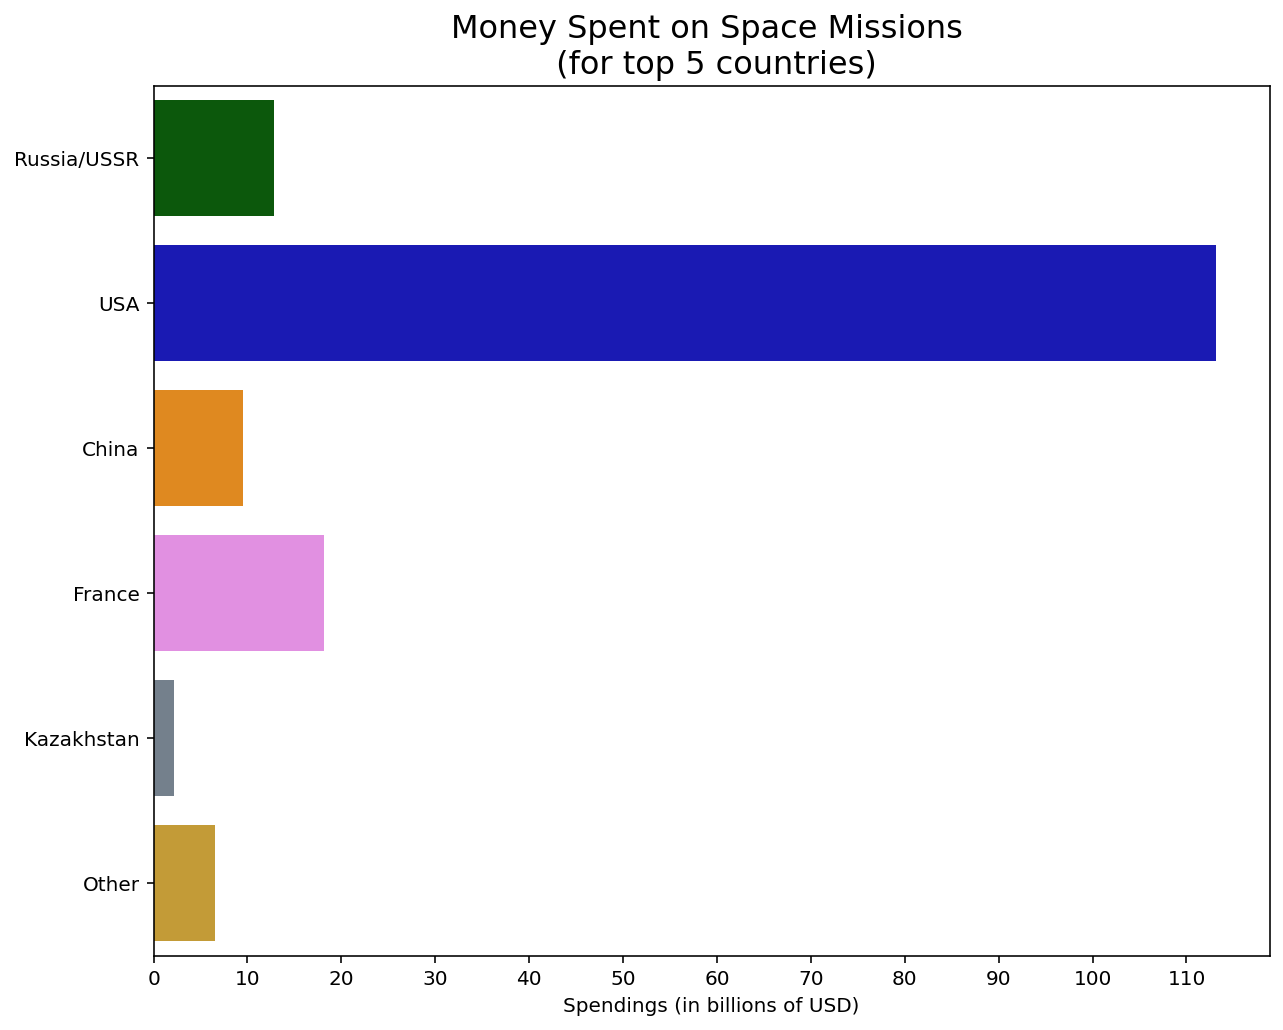

In [30]:
# Plot how much each country spent on their missions
price_country = space_missions[['CountryOther', 'Price']].copy()
price_country = price_country.groupby('CountryOther')['Price'].sum().reset_index().sort_values('Price', ascending=False)

sns.barplot(y='CountryOther', x='Price', data=price_country, palette=country_color)\
            .set(xlabel='Spendings (in billions of USD)', ylabel=None, title='Money Spent on Space Missions \n (for top 5 countries)',\
                 xticks=range(0,120000,10000), xticklabels=range(0,120,10))
plt.show()

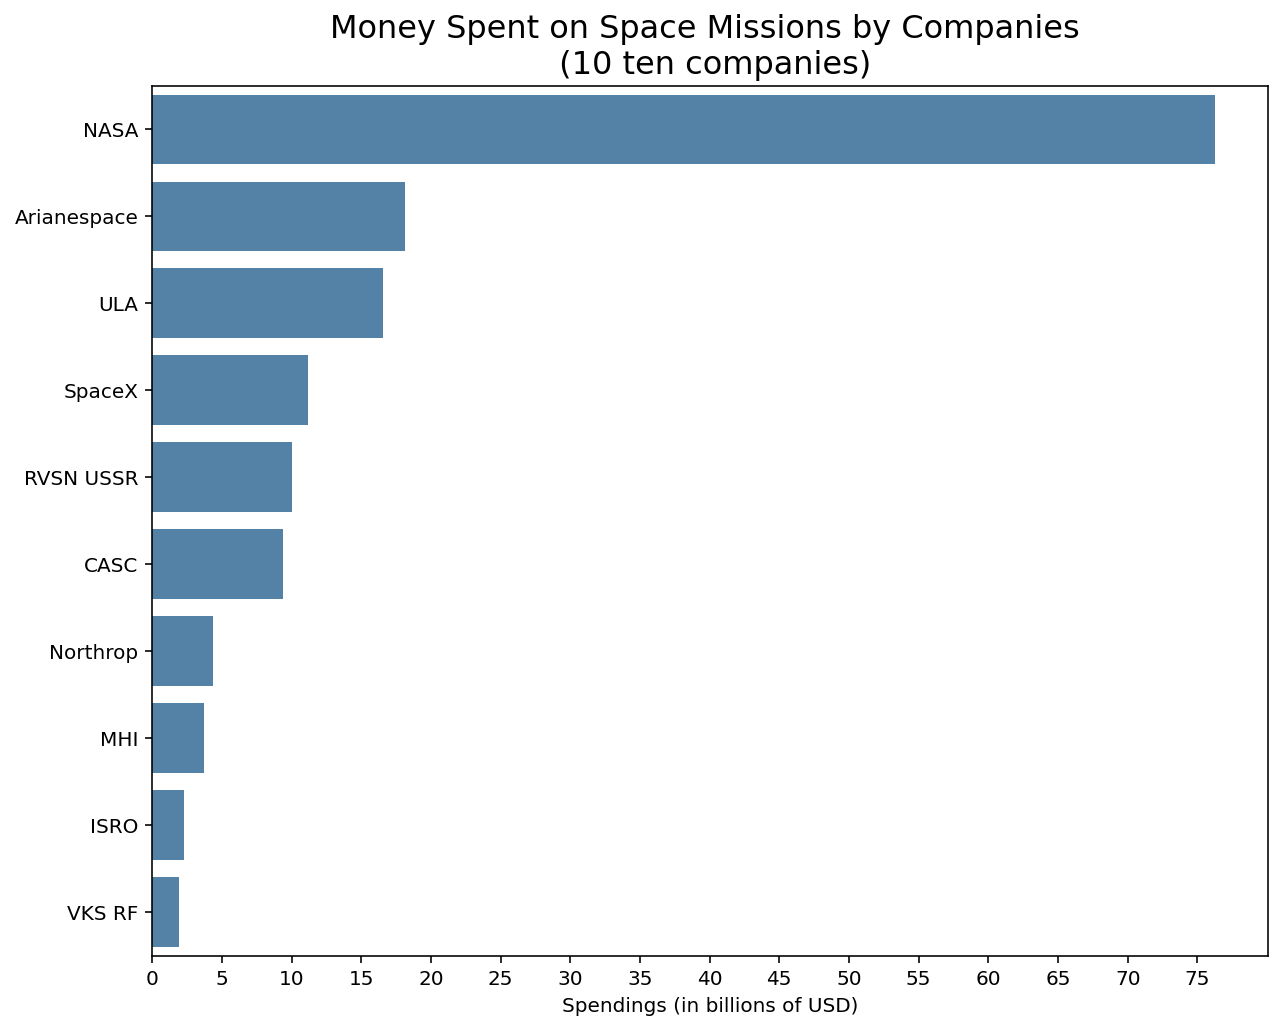

In [31]:
# Plot how much each company spent on their missions
price_company = space_missions[['Company', 'Price']].copy()
price_company = price_company.groupby('Company')['Price'].sum().reset_index().sort_values('Price', ascending=False).iloc[:10].reset_index()

sns.barplot(y='Company', x='Price', data=price_company, color='steelblue')\
            .set(xlabel='Spendings (in billions of USD)', ylabel=None, title='Money Spent on Space Missions by Companies \n (10 ten companies)',\
                 xticks=range(0,80000,5000), xticklabels=range(0,80,5))
plt.show()

## Plotting some graphs related to the rockets:
* __Most rockets used before are currently out of service (retired).__
* __Russia/USSR is the #1 country that re-use its rockets. Out the top 15 used rockets, 11 are Russian. Also, the average usage of Russian rockets is around 35, while the average usage of American rockets is less than 10.__
* __This could be a reason why the Russian spending in space missions is significantly lower than American spendings, but more data is needed to make a concrete judgment.__

In [32]:
# Get a list of all the rockets used, with its current status (whter it is still active or retired)
space_missions_rockets = space_missions[['Rocket', 'RocketStatus']].copy()
space_missions_rockets.drop_duplicates(inplace=True)
space_missions_rockets['Rocket'].value_counts(ascending=False)

Sputnik 8K71PS            1
Soyuz ST-A/Fregat         1
Mu-IV S                   1
Europa 1                  1
Redstone Sparta           1
                         ..
Atlas-E/F Star-37S-ISS    1
Atlas-E/F Agena D         1
Atlas-E/F SGS-1           1
Atlas-E/F MSD             1
Proton-M                  1
Name: Rocket, Length: 370, dtype: int64

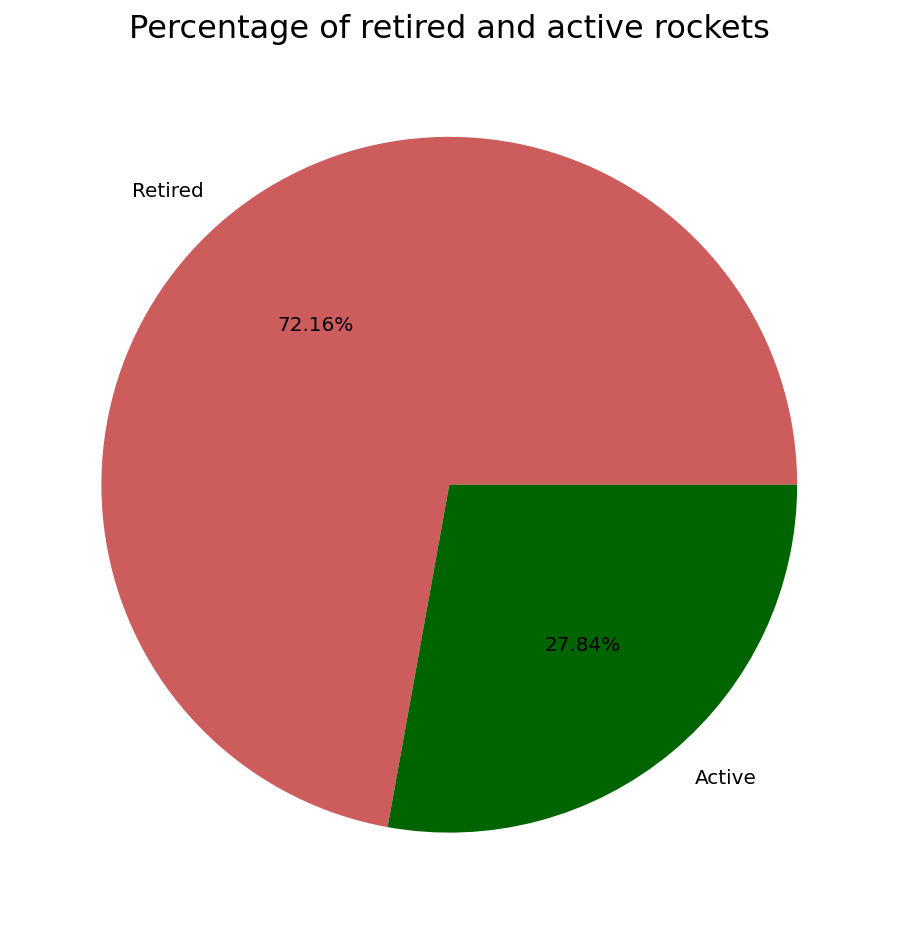

In [33]:
# Plot the percentage of Active and Retired rockets
space_missions_rockets['RocketStatus'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=['indianred', 'darkgreen'])\
            .set(xlabel=None, ylabel=None, title='Percentage of retired and active rockets')
plt.show()

In [34]:
# Get the list of the top 10 used Active rockets and the top 10 used retired rockets
top_rockets_active = space_missions[space_missions['RocketStatus'] == 'Active']\
                .groupby(['Rocket','RocketStatus']).size().copy().sort_values(ascending=False).iloc[:10].reset_index()
top_rockets_active.columns = ['Rocket', 'RocketStatus', 'Use']

top_rockets_retired = space_missions[space_missions['RocketStatus'] == 'Retired']\
                .groupby(['Rocket','RocketStatus']).size().copy().sort_values(ascending=False).iloc[:10].reset_index()
top_rockets_retired.columns = ['Rocket', 'RocketStatus', 'Use']

top_rockets = pd.concat([top_rockets_active, top_rockets_retired])
top_rockets.sort_values(ascending=False, by='Use', inplace=True)

top_rockets

,Rocket,RocketStatus,Use
0,Cosmos-3M (11K65M),Retired,446
1,Voskhod,Retired,299
2,Molniya-M /Block ML,Retired,128
3,Cosmos-2I (63SM),Retired,126
4,Soyuz U,Retired,125
5,Tsyklon-3,Retired,122
0,Falcon 9 Block 5,Active,111
6,Tsyklon-2,Retired,106
7,Vostok-2M,Retired,93
8,Molniya-M /Block 2BL,Retired,87


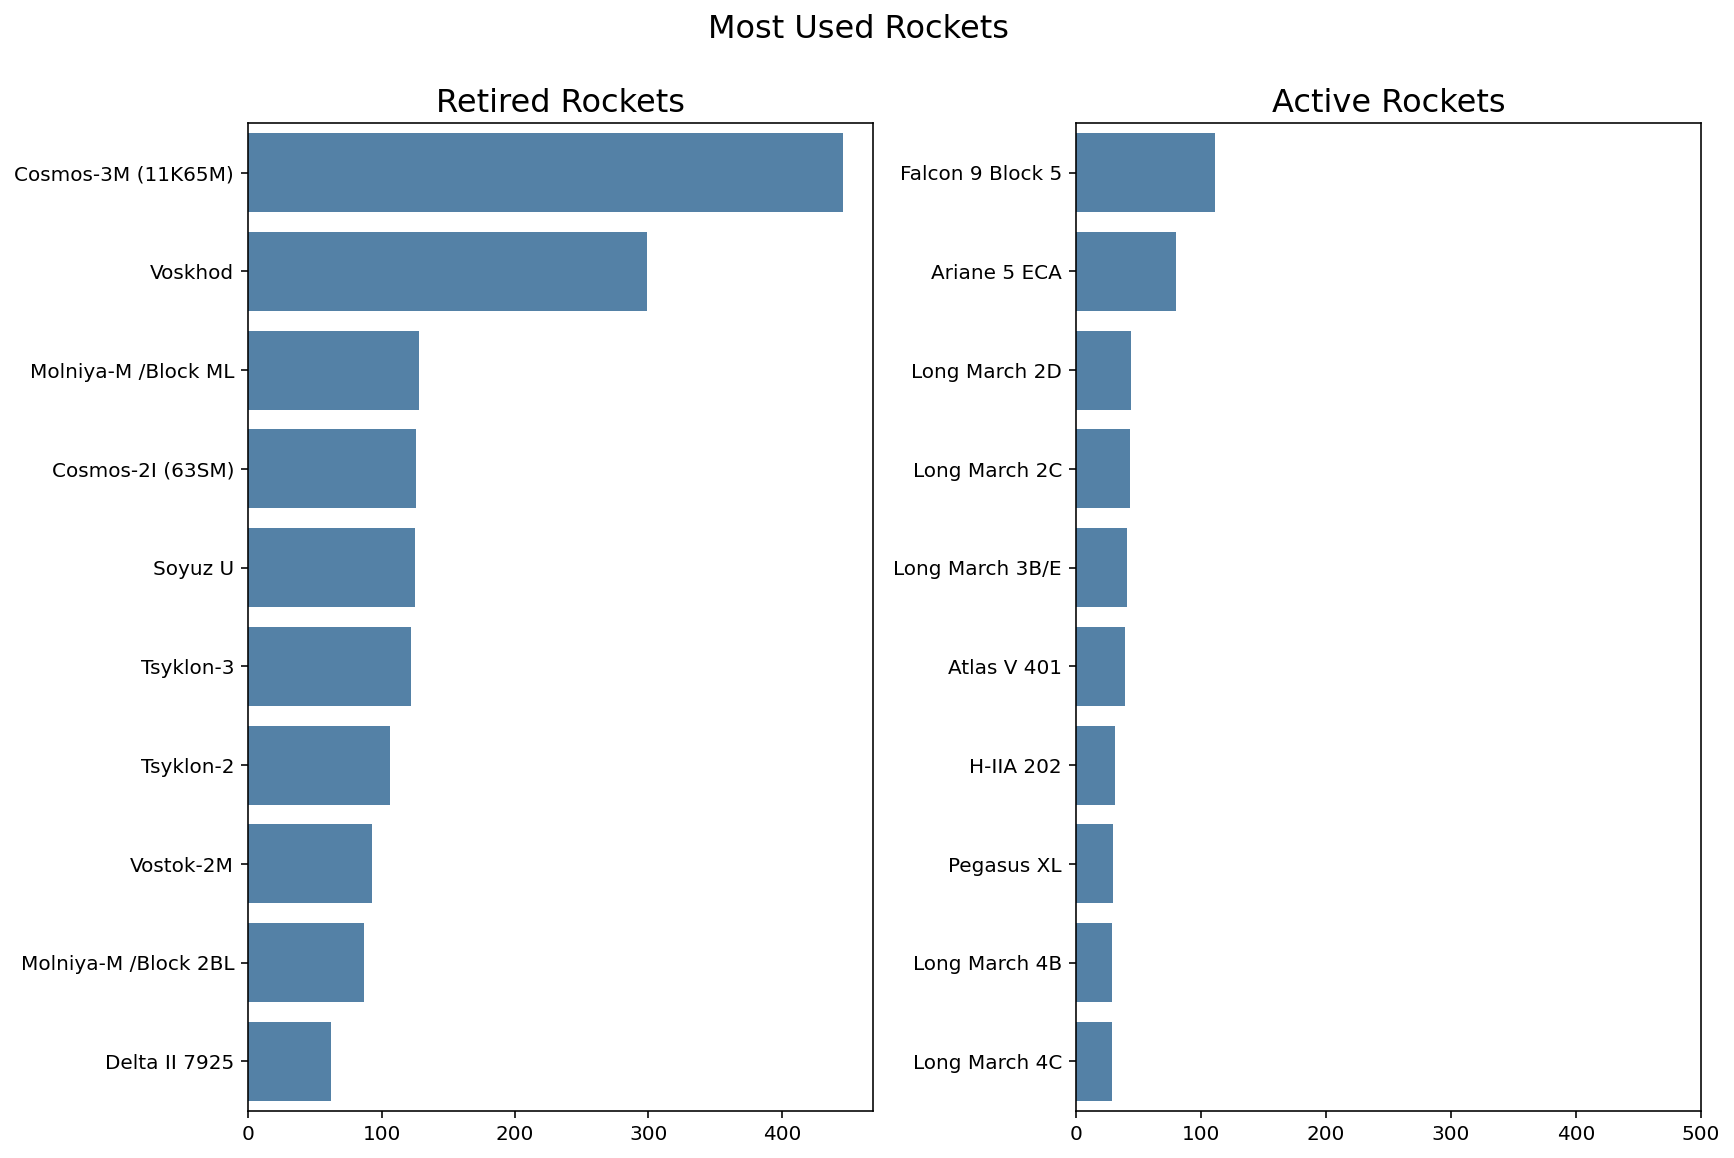

In [35]:
# Plot how many times these rockets were used

fig, ax = plt.subplots(1,2, figsize=(12,8))

sns.barplot(y='Rocket', x='Use', data=top_rockets_active, color='steelblue', ax=ax[1])\
    .set(xlabel=None, ylabel=None, title='Active Rockets')
sns.barplot(y='Rocket', x='Use', data=top_rockets_retired, color='steelblue', ax=ax[0])\
    .set(xlabel=None, ylabel=None, title='Retired Rockets')

fig.suptitle('Most Used Rockets', fontsize=16, y=1)
fig.tight_layout()

plt.xlim(0, 500)
plt.show()

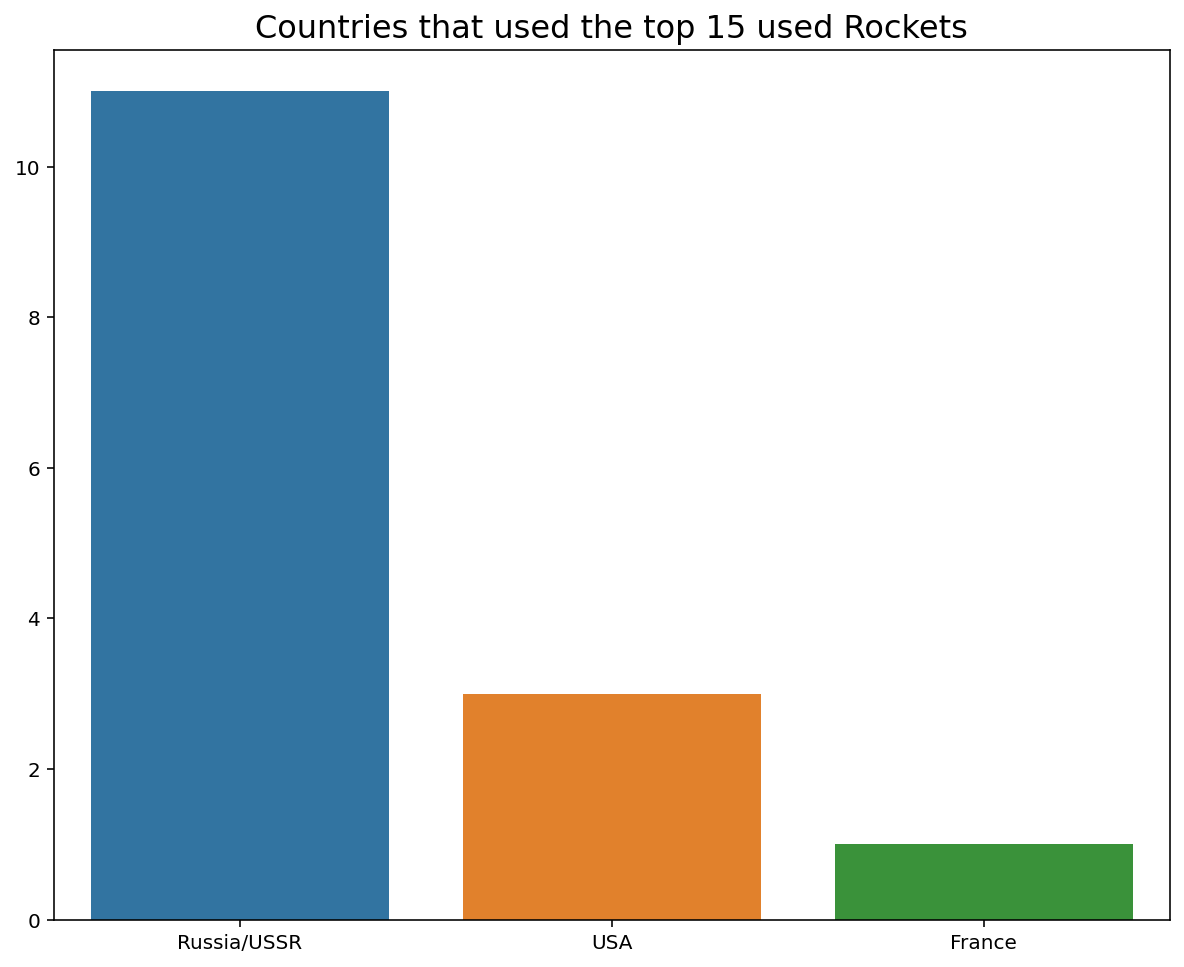

In [36]:
# Countries that used the top 15 used rockets

top_rockets_overll = space_missions.groupby(['Rocket','Country']).size().copy().sort_values(ascending=False).iloc[:15].reset_index()
top_rockets_overll.columns = ['Rocket', 'Country', 'Use']

sns.countplot(x='Country', data=top_rockets_overll, order=top_rockets_overll['Country'].value_counts().index)\
            .set(xlabel=None, ylabel=None, title='Countries that used the top 15 used Rockets')
plt.show()

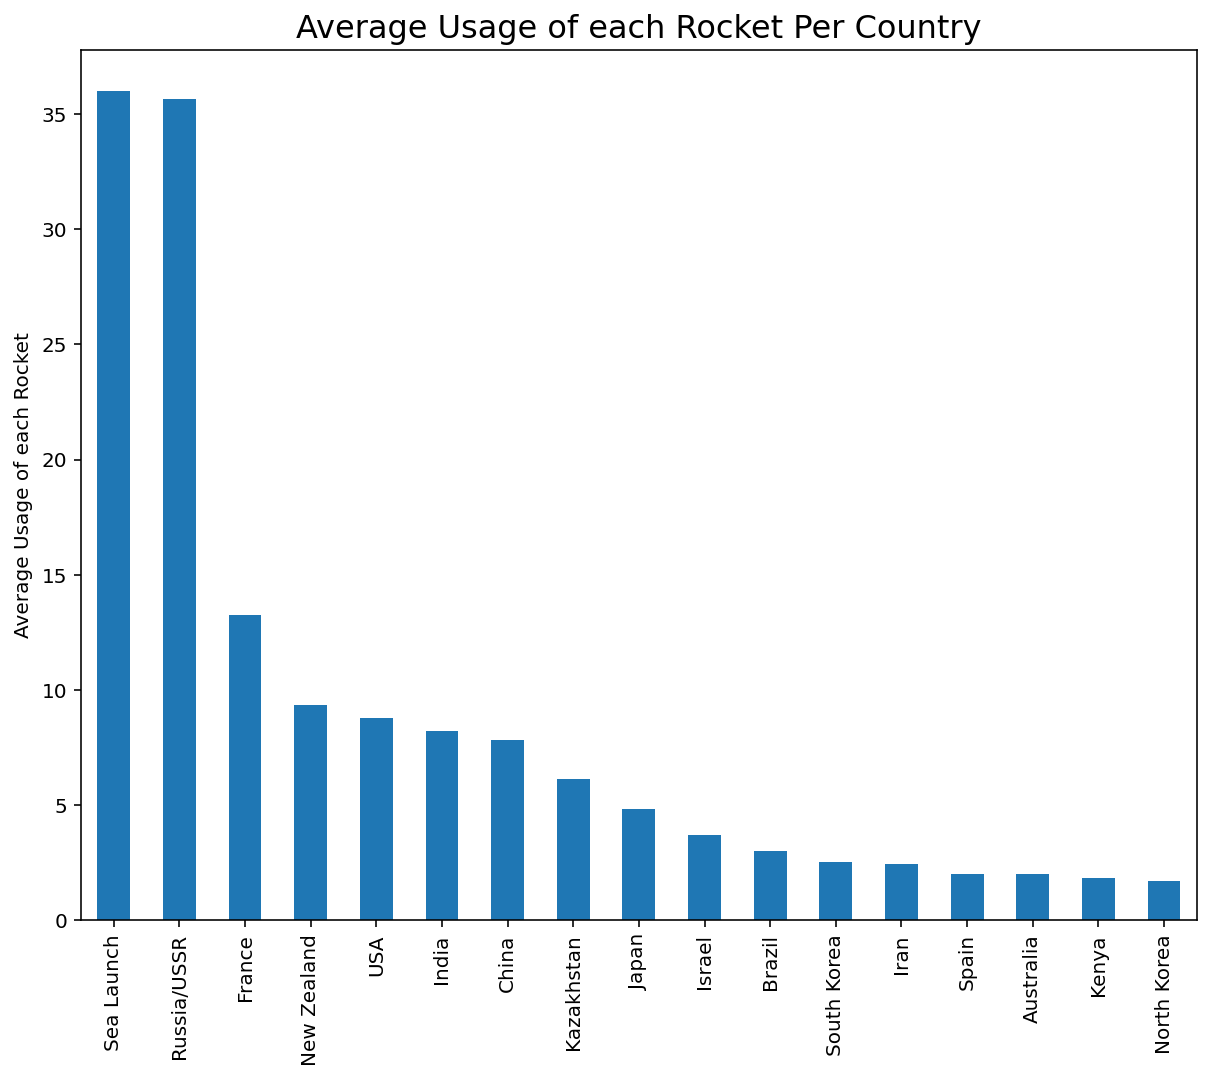

In [37]:
# Average usage of each rocket
top_rockets_overall = space_missions.groupby(['Rocket', 'Country']).size().copy().sort_values(ascending=False).reset_index()
top_rockets_overall.columns = ['Rocket', 'Country', 'Use']

top_rockets_overall.groupby('Country')['Use'].mean().round(2).sort_values(ascending=False).plot(kind='bar')\
            .set(xlabel=None, ylabel='Average Usage of each Rocket', title='Average Usage of each Rocket Per Country')
plt.show()

# <font color='red'>Thank You!</font>
### Hope you enjoyed my analysis and found it useful.